## Linear Discriminant Analysis (LDA) on the Iris Dataset

### Introduction

LDA is a statistical method used for classification and dimensionality reduction. It's particularly effective when the classes in the data are linearly separable and normally distributed with equal covariance matrices.

#### Objective
LDA aims to find a linear combination of features that best separates two or more classes. It does this by maximising the ratio of between-class variance to within-class variance, ensuring that classes are as distinguishable as possible.

#### Assumptions

- The data for each class is normally distributed.
- Homoscedasticity: All classes have the same covariance matrix.
- Observations are independent of each other.

#### How It Works

**Mean Vectors and Covariance Matrices:** LDA calculates the mean vector and covariance matrix for each class.

**Scatter Matrices:** It computes the within-class and between-class scatter matrices, which measure the spread of data points within and across classes, respectively.

**Optimisation:** LDA finds a projection that maximises the separability of the classes by optimising the Fisher criterion (the ratio of between-class variance to within-class variance).

#### Classification

After projecting the data onto a lower-dimensional space, LDA uses a decision boundary (like a hyperplane) to classify new observations based on where they fall relative to the mean vectors of each class.

### Illustration

In [1]:
b64_string = 'iVBORw0KGgoAAAANSUhEUgAAAZgAAADFCAYAAABpXOTIAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAHUaSURBVHhe7X0FnFVV1/7/+3ztV7GD7u7ubpBu6QbpDmmku7slJAUEQUKkFRVBBAGlG+ma2efs57+edWf4FBGJmTt3hvOc35Hx3jv3nrln7/WsXv8PHjx48ODBQzjAIxgPHjx48BAu8AjGgwcPHjyECzyC8eDBgwcP4YIHEsz169exe/du/Pjjj97pnVHyPHHiBFzXDVnxYYurV6/i559/vu/neqd3RvaT3HDs2DE4jhOy4v+OfyQYay2+//57pEiRAkmTJvVO74xyZ8KECdGzZ08EBQWFrPqwxcaNG5EhQwYkSpTovp/vnd4Z2c9WrVrh9u3bISv+73ggwWzfvh3lypVDv379MGDAAO/0zihz9unTB++99x6aN2+OO3fuhKz6sMUXX3yBmDFjomHDhve9Bu/0zsh8tmnTRtf2zZs3Q1b83/FAgvn2228xbNgwfQNqed7pnVHlvHLlClKnTh3uBJMgQQKsXbv2vtfgnd4ZWU/uGbrJaME8EcGMHDkSwcHBIY968BA1wE2RNm1avxDMhg0bQh7x4CFqgHFLxhdbt27tEYwHD/fCIxgPHh4fHsF48PAAeATjwcPjwyMYDx4eAI9gPHh4fHgE48HDA+ARjAcPjw+PYDx4eAA8gvHg4fHhEYwHDw+ARzAePDw+PILx4OEB8AjGg4fHh0cwHjw8AB7BePDw+PAIxoOHB8AjGA8eHh8ewXjw8AB4BOPBw+PDIxgPHh4Aj2A8eHh8eATjwcMD4BGMh8gOR44bcly95+BjVo7whEcwHjw8AB7BeIhMIGGQUIwcQQiWMwjHcBxtbWfUt83+cnawXXFFiCZYDv5OeJCNRzAePDwAHsF4iCxw5diHX7DRbkI32xvlbDWUtVVR0lZEflsSdWxjIZaP9Kxh6yOvLY7Stgqq23pYjGVCRMfCnGQ8gvHg4QHwCMZDIIOWyk3cwhEhhwmYgoq2hpDJB0ooRW1ZdLbd0Nf2x2RMwxk5/sBFPY/KMdKOQW/bDx8oAX2AVrYDLsgRlvAIxoOHB8AjGA+BCForJIyFWIKWtj3q2qYoZsuhhK2Ahra52CPLsQ4bhEou4roct+SgdRJ6OPL7fOyaHGvklWXF2ilsy2ALtilphRU8gvHg4QHwCMZDoMBHDI6Sxg58q64ukkJeWwK1bCNMxQz8ioNCO2cfKabCWM0KfKEutVK2svz22Yf+3X+DRzAePDwAHsF4CARQ4DMYv0RsEwbsSSy0VvqgP8ZhIk7gJG7L8bjEQGtmAIaqq2wRlupnhQU8gvHg4QHwCMZDRIPWyO84gumYheK2nAbnP7GDsAFfa7oxM8We1OLg7+8Uq4huth7oq4QTFvAIxoOHB8AjGA8RBcZZTuE0vsJ6VLI1UUCsi3L2Q/SwfXEeF/T5sHJlEWdxDmVsVXQTu4iJA2EBj2A8eHgAPILx4G+QNGiVzMKnaGpbo4gti/K2OkZjPHZjjwbtSS5hjXNCW2VsNY9gPHjwFzyC8eBP3JHjEA5jDCZomnEhWxrD7WhswdZwI5ZQeATjwYOf4RGMB3+AVgsD62uxTt1gdIdVtjUx1I7QrLHwJJZQ+AgmbFxk5AXHcZQTwpVg+MWERRDKg4eIgEcwHsIblIwMqq/HRlSwNZDbFkMz21ar8m+JqPeX7GS8h5X9T0ow5ISrV69i2LBhWLNmDX766afwIRh+McdxQky8UfoFevAQ2eARjIfwBGXkBbFQWth2KGLLaMEjrZjTcvjDagkFCy9ZR5PPlngigiEfXLx4EXXr1kWMGDGUZH788cfwIxj6E9vbLuo/9OAhssEjGA/hBbZlYV1LE9sKxW15tLOdNfWY9Sz+JBeCqdBDMUoJZjpm4w6CQp55eJALzp49iw4dOuD9999Hu3btcPz4cezduzd8CaaFmHv073nwENngEYyHsAbl4h+4hBF2jFotLJociwlaQc9wQkSABkBfDEQBW0prbh6V4LhPTp8+jR07dqBOnToYPHgwjh49CmNM+MVgQgmmtK2KpViu/+/BQ2SCRzAewgqUf7QUGOsYYUcJsZRVcmEjShZMRpR85OduFMvpA1tJG1/SGHjYK2GWGPfFokWLUKBAAWzZsgUnTpxQLiA3hGsWWSjBFLXlMAtz9f89eIhM8AjGQ1iBWWJ0gTGQnscW05Yv7B0W0fHpm3IMwjCV09uw46GtF8p+ur/Gjh2r6zdv3rz45Zdf9PFQeATjwcMD4BGMh7AAXV9rsV6tBGaJfWTbKLnQoolIUCYzoYDZa8VtBbmmQyHP/DtIHnSFxY8fX60Xusfu5QCPYDx4eAA8gvHwJKDM+10ODvTirBZ2K2Yw/6BIxrBqKPkk4PVtw3Ylvu62z78mY1HeM9ZCmX/t2jXMmzcP8+fPV0smKOjv8SO/EcwMzIlwtvbg4VHhEYyHxwVdTQyYN7EttSK/sq2lFfnMHvN3ltj9QPnM2S8tbTuUsVXwBVY/8Loo65kl1qpVK6RIkUKJg/Uu3Bd87n7wC8Gwl86Htq6O5PQQucB7yEX3Twefj8rwCMbD44B7g7MjG9sWyGWLorRYLgykmwBSsnmNX2GDJho0s631ev8JlPNXrlxBy5Yt8dZbb2kq8vnz5/+RWELhN4LhnIEf8VOUF0hRBbxPPJg6uQM71Yy+30kNLSpbph7BeHhUcN/QBcZJk6Hk8gW+1PqWQAKnWfbBAE044FwZZrLdD5TxJIply5ahbNmySi50k/0buRB+c5GRYHbiO2VND4EJ3i8GI4/hOGZjLmZiDjraj1XDoYl/71lYTo5nnYsF2i+Jvx/V4BGMh0fFYTnao6vskVJoYztpZT4ztQJpf1AO/yJHQbnGkrYifhD1/36KItf/0qVLteULK/TpIqMl8zDkQviFYGrY+qhjm6CV7YBLcngIPNyQg/eGLcFr2oZa0VsopAisrx2INWJM33t+hsU6VY+v6Wp74oocUQ0ewXh4WFDeXRErgKRCpXoKpuueYjA/0JQvxoFa245iYRXRgs/LctwLBu3nzJmDePHioUGDBrh+/fpDE0so/EIwzJxgd1Cmwp3GmYD7sp9G8B5QY2FRFXPfGYhkEJItK+rYxmhgmwl9LMUu0W04iIgaz70HTX7Op+hu+6obdHBI59eodH89gvHwbwjdSyygbCvkQotgKEYquQQiuHc5vZLjAErItdLVzWD/n0FyWbhwoa79rFmzYuvWrVqV/6jwC8EUE6FVzdZBVTlPyOERTMSB3z0DjSSH5ViJLra7WiBcaB1sV20PzgalF0XDedgu2LyndKUVtKUxwA7+R19uZIRHMB4eBO4PpvYuwhJNP6YiPQSBrWixz9gnGIg8tjj6YpBc/Y2710pC4DqnG4wFlJ06ddJmlY9DLoRfCKaObaQpcBz7ybnSgZD//TSCmgtN4y2is7SzXdS9RS1moB2mrcJpJt+W5feoG4OvPyn6WxvZYKxSJkEF6uZ6VHgE4+FBoOUyHwt1H3FW/mAM18LFQF3/VC5X2lUobz/Uzs3f4jv9G3i9JJFDhw6hcePG2LhxI27cuIFbt24pSTwu/EIwDexH6pfkDeiOPirEPPgXV3FNzWKOYGWAnoVVreWecOYEs0lIPk+yKdjue7SdoNYqXW73mtyRFR7BeHgQzsnRAV01ZjkAQzUOyb0UiOD+ZoiCin4xWw5bZaeGBvYvXLiAdevWIUeOHIgVKxaWL1/+N3n+OPALwVBTZhZZc9tG62F+xO6AvQlRCfz+aS1+gVUahGfgkSZ8b9tfeyIx7z10gT0p+Flf4xtduF1sD00aiArwCMbDveBap/uYmZZMXKL1QpcTvQN8LlBBmTsRUzR5hynU5+V6Q8E1mClTJiUCVuezSp+y/UnhF4JhkL+n/QRL8Llqz+PtZI0BeAgf8HunBbFHjs5iM5a1VTUXn5thiV2mC+th4yuPAlpC1WxtzU6JKvN/PILxcC+olH2JrzSxhfKsl9BLoMeWSS60XirY6qhtG+F7+wOu37quzSlJJkeOHFGr5dSpU7h9+3aYkAvhF4JhNSt9/FVsLS3qof/vDM4G9A2JrOB3SstkE7agnm2CvGK6My6yVjbEOfnOw9NyZFfY6raeRzCPCI9gIg+4fziBsif6qcuf0x+ZPRbIsozXxow2Kvn0YAy3o3HuxjktnEyfPr2uO8ZfKMvDilhC4ReCYfZYFdFsma3Uzw4WLbcOxtqJXiwmjMEoyh05+tshyG9LIp+cgzEC32EXgsViCW9wzGp1WxdtPIJ5JHgEEzlAecYYy0AM05hLD7VcTurjgQxaXExF5jXTlXfCOYlP536qXZBz5syJffv2wXHCpxuHXwiGfnnWV8ywszSLjFPc6LKJDDcnsoDEQhckEypotpez1TADs0XM3whXqyUUvI90v7EyuIftq5XLUQEewXgIBbMsh2GkusY62+44L4c/9taTgPvyF+xXucDr3oXvsWnrJpQuUxq5c+fGzp07HzsF+WEQvgQjb35y81K02VIMc4LYsH/B3alp1K6nCdlElWyjiAIXEMnlM7tYC7yopTDIHpod5i8C5+eMtZM0oeOf2k5ERngE44FgzHiYHaWKMuvF2E4p0MmF4MyZ5rYtCphSaPtTRyxavQjHTxzHr7/+isOHD/9NZoc1wpVgxO7CnUr1cLxCMcy/Nl2D/TVtA+1xRV9gPWFVNoXzlxCMamBOOyvph9iRKGOraouX0Xb8Y83UflLwHo6xE/Uec/NFlXvqEczTDa5jWi6jMU4HcpFc2GvscfcX5SXlJAPr4Wk5EFTyxovSlzeoOLLszoOsJbIid57cOHbsmF4Hz/BG+BKMfIGmeDVsLpoYH1wuocH9zdiKvhigact0p7AAM8grvHwkcNHTBcXixuq2vk7IY3bIXvysFmFECHdaUUNFw/MKLR8dHsEEJriGmbgyCVM1WYaFxE9quVDg0i3VuXNnHD16NOTRsAWvm+RyGL+hvPshMhzMhVeLvI5or0fD7NmztYDSX/ALwXxRNDZqX66lmUwkF8YIuqA7utpeKCekw26jnqvs4cDFw95gvW0/dTfSZGcR63bs0JqXiAJrm3gtNMcDvR7gUeARzNMLJqqMx2RVhOnS/wl7nohcCAbT165di/Lly2twPTysCF7jdrsD5Z0PUTqoMmrOqY1qNapgysRJuHH1Kqxx1LsER/4WIQC5iJDfDHv4hWB+LZwF6658jkEYpi3e2bdqIzahtm2sMQMW/VzGlSgjlMIL/H7+wCUlF7oYmTxBd+MfckQkQVNbWo8Nqjh8KepCVFIWPIJ5OsE1zb3FwDhl1GA7TDPIHhdcO6Ht7tlEsmTJktiyZYsO7eJUyLDM4rpx5wa6nOiBWP0SoMP85jg+eBAuVm+G6/XawHzUBU6zrr6zRTe4sxfCnjuvsjo84BeCuVCwEAZd7qUCiORCi4Wpy0VEQA7FKPXbT7UzveLLB4DfDTPyPrY9VaP6WKw/9hH6c6O6iMIZOWrZhroZv8WuCL+esIRHME8nWIzMOjKSywA7RFstPUnchWRSrVo1JRZ2J44ePTry5s2LUqVKoU+fPjh37tyTWzMizG+ePIl5s2chfq4EePHVZ9D7jTi4+lpKmFcywLyeDeaNkJM/vyqPRUsDk64s3HVfw164GObWjF8IZl3R+Ch2uZh2G/1KdF22hi8swmgO5mncgJ18qY0vwlL1eXr4K/idMAWZLjFaLkwDZqHqk5rrYQVWNVN5GCAWalRJTw6FRzBPF6gcsSiR7ZTYWqmfHaTpyE+iNFFGsonkrFmzMHHiRJ1pzwLHXr16YfLkyVi5cqVaMY8MXhJdXHeCYE+fxZ2FizG/XVkkTfQ+Mr70ChqV/AC/VaqD4MbtYHfthv392P+dvx2F3fEdnCpNYKKnh3ktNZx6bWEv/hGmJOMXgllTNB46XmmLrdiORraF3jj2xGGL605i0bD6m1X+xWwFDRAHiuCMaHBRs7X2EizT9F9WDne0XQLqO+I1dkJ3vbYJmBrl7p1HME8PuJZpufSwfbRQmd6CsKrSpwuMM1bYnZj3u0yZMvjpp590TVFuPpL1wtfSpXblKtwv1yGoRSdcLF8bn1VOigIbMiHpxOQYO7oRrok14167xkXse/294GNXxTKbPNNHMi8kgqnbUt83rOAXgjlTKD++ubIKTW0rsMhyFMZhsQhNBvhJLJ9jBVrYtiqk2JGUGoMH+frk4NAvZmbReulsewi1BBa5cGAZWwGxcJYFXWGxGQMJHsE8PQiW/TZBFF9mjNHduw7rNRYTlqDA/eqrr1ChQgXtA/ZIxELQYrl0Wa0PI9bHnVhZ8N3/ewdl/ucFZO6dALmuF0bLoHY4EvybvPdDyokbN+CMnewjmZeTw5485SOxMIBfCOa3QtnR4nJjbRUzHpOwUMQm27pXtXWxGmvUDKXGwCmKfA0J52m2Yiik2YySY4lJLDVsA41t0HQPJAGugVA7J6QF0CDcjoLuTY9gng5Q3rAosZ5tqhljM/GpZpGFNSgvKXDHjBmD06dPhzz6EKDAFwvIXbMBTvMeMK+kRVC0lNgdLytKPPMCXnjnP0jyWWq0DuqAI49RB2fF0nEadBArJiHcxV+o7A4L+IVgVheNgyJXiim5hGrkdPl8g834xA7UoHVH2027//JntjWISrUUjwIuDBaftrdd1JVYTUjY10ss8OZ6M3uNhbNM0jiCo1HyfnkEE/XBdXtWDlrijCXOwVzcwM1wW88UunSX8d+HgrzO7jsAp1YzmHczwvw3MZzaLfDb0FEonS8PXor1PBLMTIEW19risD38eFaXfAYD/SZaWjj1W/vcamEAvxDMtiLJMPHKSCzDch12w8aXHNc72A5XS4bCdLlYLZwFz1oKCtbWtgN+w++PzMSRGfxbmWvf0DZXM50z8r8WEmYcJtBAC2sdNmjSwVA7MsrMf7kXHsFEfVB5Y3slelFYAsCR3xGuLNFicRzYk6fhrt0Ak6MCzIsJEZyuOM5OnIqtc+dhz8FdqL+lEVJ/kxmNrzXHL3b/E5UI2BOnYN7KJuTVHLgRiQjmj4JFsebKYm3AyDGd87AAozBW/Zwf2TbqJvvItlJXC32gAzBEBRc7LlOQPQ0gueyXo5GSS3FUFCJm8WQg/v28Vk6tpCVaylbSEcxRVRHwCCZqgwJ5O3bqWma7JdZzRfhaJrncug132So4DdtpOnFw9Iy4VbomTsyYg14ff4ykaZKg+Q6RmW5pFHHLau/BJyEXxekzMG9nj3wEs6tIKlS5XFGbMa7EKozAGHWFsfUCW8cwbbmQ/D+bYTL9drgdpc9XEg2etR9P/MUFOLigWcRFy4VtX7jYt8j3EtYBxrACa3I+sYOQyxbVdM5r4eCrDhR4BBN1QSvlAH7Fh7ZeiGxaLSs7fO7xQ4NV9leuwBk3VYR9ephnE8Cp1wHBi7/AshkzUaFsWbz29mt4p2l0ZDyZR+UF92KYeBAiK8GsLBoLla5U0uD9aIxXP2djIRXGYD6yrcVyKS2UM0FjDbRaWLQ31k6Qm15JrZ7v8UPACtsnBRc5XYH8m3PaItpTbKN8M4FMqrxvvhEMFbAHe6PsvSE8gom6YP88elOozM6zCyK+Bo9xkC3bYbKVhHkpGUwiuqtaq5vMEdk6ffo0ZMyVCW/XeQ/pj+VEXqcEutveYTe8MbISzM+F02PtlaUa5Pe5xVpjB75FM9tW/3+MPMPMMmoRDBqzjQwFVw1bX7XkXugfJX38XBRsSNfCtkMeW1xHGzNzLJA7GrBOoJvtpZk2XNwB4a8OR3gEEzVBpWipqLyMAXOEMD0lEbaORQjbo8fhDBsDk7wgTNzMME3awvlmK+6I0F++dBnmz5+Ps+fOYtPpb5DzQmHkMkV0H56WI6xceiQy82YkjMGcL1gIk66M0MwxkgtvLIUqb+5QjMRczNeANgUsA8f0J7a1nTQmU1RO1suwA0BU8/OTXPh38nuZiKliGWxRLSpQBTava5Qdqxpfe/sxTskR1e7JvfAIJuqB65hjxSmDSsreYzwxwmKdJBdaKDWbw7yQVMglG9yZ82HOnsOu7dvRpEkTpEmTBlWqVsHhy79p2xomI3D88VE5wsx7QOtp6lyYl5NGPoLZWDQhil8urs0tN+JrtEdXEVKlMVxsF/YlK2+rqyuMLjJ+aRS6dKMxO2m+2DZ0ofW3g7UfUFTQlvk30Kxlphwz5ug2DGRiIXhtJBS68nhv2LomKtyLf4NHMFEPHO09xvpc9a1tR5Urfge3zrXrsN9+D+fDJjCvpoBJVgDup4s0wB8cFIQ6deogVqxYyJEzB1ZuXon+wYNV6eY1s/9fmCp3IqudVj1hno8Hp2Nf4HbYeFH8QjBfFImF5peb6FzodraLasC0XDgLpoKtgTK2ihDNeq2r6CCaMb9ENsHk88w6q2prqyuN8ZlATNl9FFAo063U1nbWv3OUkAsHGgU6GBMaIdZLUbkPzPTj3/A0wCOYqAXuPw7ko9eAXdw5tt3vVrjITPYPc4aNg3k3HcyLCeC07QZ7/AScW7fghrSVYZ+y6TOm4/czv2NI8AhVyikfw5xciKBgOC16qAVjDx4WZggb5dEvBHP01ZjYuKybzrGm1vAJBmlbd3ZU5hAyEgl9oKHFhSy+XIplqCsWzzQ7ExvE7qlqaykRReY5/rzuozimf2coyT5pIz1/gOTCeS9MQGBcLCpNrPw3eAQTtcDu4x+jlyqstMK5tv0KusSOHIMzYjzMe5lgYmeE07or7ImTuHDuPPr27Yv+/fvruuN6Ox90HsPtaL3edraTysnwIERNLkhVCCZRTtiz53wkGAbwC8HceTYmhgzIhIJuKSGXgZqqzOpvZomtEnJhFXh39FZLZQhGyCNrUFME2QQ7RbX7cWK55LclNCVvDCZqYVRkAwUyG+d9LH8nW4Dz76TF5nft6RHB69uF7zU+xsyxFaIOMPvmaYFHMFEH3IOhg/E4NuQCLupjfoPIR/e7H2BSFhWrJRlM3gpwt38Le/Ei/pCzR48eiBMnDpo1a4Zrt65p0TX7NrJ/Iwf5hWnM5R648xfBRMsAd+UaldthBb8QTNB/YmJA//ToZwdrBT/H/DLAv0qI5KQcPdBHXUacdc0gP/sBkVwYp5hgJ2t2GTsu06VU3TaIlBX+DCpSc+KoaFpx/Lsjw99AMull+ym5D8Zw9Vc/LdYL4RFM1ABX7C84gAa2uSq2K0T6+NV6MQ7cTVvFSigg5BIfJl95uN9+r6Rj5BwwYADixo2rQf3fjv+O1e4arQNkwTndYpR54VYOcOUqnBqtYF5PD7tnX8iDYQO/EEzwMzGxu08zbLFblVxovZBo6EvsgwFoZltrWvKvcrDhJU1CzpufhU/V78guzHw9CxBz2MLYhM3+N22fACSSPuiv5ELtiSnZT5K1wpvG7z28wXTp5WKxsMK5iq0jut9Pkep7Dwt4BBM1QK8H509RueO/fit74D49fxHu+k0wWUrAvJ8WzshxcPf8jNvXruHUqVO4dOmS3vvFixfj8PHD2OxuVY8BlToWX4erQi3XZ3/cAxM7K5zyjYE/LoU8ETbwE8HEwve9m6CmU0+DawuwSPO3GYshuVBwsS6GVgrTYOkym2FnqUumjm2kbhkOK6OApjUz2kaOwDjBhcFqYWbJMUDOMaxPUucSesMOHDigP4cnfKReWe/LD/jxqSMXwiOYyA9a3JQpLHdg89gjOOYfK5yK4IlTcD5sLMSSCSZmNrjzl8DeuIGg27eVUPLly4fPP/9cRKXBHScI6+x6TXzKI+RCxfoADobvvqOMZhPNVzPAnfapXnNYwm8WzJoCCVDheEnMtwv1ZvfHYPUrUnCxFX0T20LTkhlA/hTz1YVGa4apy/SXMsjFVOUBdpiS1H756gMdNGl/l4P9xUiWMzBbXUxPAmaXdO/eHQMHDtSfwwskQTYfZQEoSTHczPMAh0cwkR8U0FPtDK0fmY5Z/onh0jI4fRZOnZYwz8QTcskEd+psWFlPhw8f1jHJXFfZs2fHrl27EOwGa2NbNgKmMjpI5NzP2Be++06Evwb342SBKVPTNwcmjOEXgjFCMLf/Gw+Hvl2EK/YK+onlUlFYmm3pSTbUkAfbEZr6usAu0lgLv+gfxbKpbRuqH5LzRrZim7qYCsnz/PIDGbRcSJb8O9gZmS0paJY/qeZEUmnXrh169uwZbgKP7jtakrQYm9xujJPXDsByyt2951UhS+bLh7HWE0jwCCZyg/uNdS/1bVN8qNaLH8ZKkFwuXIRTvh7M8/FhXk8GZ+5C3SsUuLzPsWPH1rHJO3fuxB1zRxVpemco37bLwXKMcHOLheL2Hbi9hop1lQbul19RuIQ8EXbwD8H8JxbMSwlwZft6DHWHo5lto24xnvyZbM3c9MV2qfr769ommmnWzfbWdN4BYrlwbDDNW6Y180aw2j9QwYXB4UUspCQ5ThOtic0sH3dhc9wqp98tWbIE8+bNwwcffICKFSvqzzSz9+7dqyb2E0Pupesa/Gh3K8mXP18CP3T7EHdS5IFJkfc+Zz4x/5vCXbgMuHxZ24tHNXgEE7lB64X7j+t5OEaJivfPQi5MQHI5dhzOR52EWFJqCrK76wcE/3EJvx44oHv45MmT2LNnD/b/uh8H7xzCUrtcY9OMu3yBL+GXhpsi+O2BgzDvZhILJiPsXlHY5drDGv4hmDfSw6TMj+Mt66HN1WbaKZjjdVno1NcO0JYpHERGNxL7ArEpJsmFi4Lzsfkce5RxuuN8fKaaCH8/UMH04za2o6Yjc/7NH084iZKCbeHChVrZW7VqVSRLlkzbR/DnWrVqaZ8izvp+LHBRcVNcvATn7Fkc3TgXH9/qqu6EvuOz4Y94aWFK1ITTtY+cff96NusMEz2zDkFymnTSaXtcuFEJHsFEbjBZiAMMOf6CSmy4WgXcRxf+gNNc9sXr6WVPdIA9dRqXLl7ExIkTUaNGDbVaDv92GI51NHjfyXYTJbSkusXYQivcCTAEVgjPad9LJ1g6DdoAZ86EPBO28AvBXM1dGJfLfYhrCdLj4Mlv8LP9WeMrbDPNwkN+sSQPZpexdUx3IRVme/SwfdV05MhgphYuwEJMxQz9OVAtGPpMOV+CMSRmva3Hxif2o/ImnTt3Dr/++qtqPiSajz76SH/mY3yOr3kkkFjkhttDv8H+KppM+QY4XbIEunyWG/nvFBOrcSjO/LAWzlfrYX8/qpXH95726lXNjnEK1xIrNT6chh31MX3vKAKPYCIvqNTRS0Ivwjg7SdsxhQu43rn/KLSbtod5LY0KbZKLlceHDBmCJEmS6L7lPP6rN67iNM5o+jHd51Skl2K5xj2fRBF9aMj1uj/shnlHrJfStdTiCi/vg18IZk/SuNheuyCCYmbBobXT0Ny0VguFXzIr+unyovuLAf++ISOU+fzX+EaZnYKaKcsMNnOxkHwCMQbDxcG4UQX7oZq7nNJJEz0sQSHXtm3bJ47B2J/2whk0BiZGBu2DdPbNWOg0NCkKXC6sjfQuq0tPNs2/kYU8b389JCQjluoLSeEOHAPciDqdrz2Ciby4KccMkRm0xleLpAm3gDljK1+JItm8C8zzCeA0bucLmHNvyDlu3Dh07doVx44dg7EGG+zXWvdHOcaBiz63mB87qItcdlr3gHkxCdwxU7UWJ7zgF4K5/UIc3E6dD3deSIwZzVOi1+2eOCcHW8SQXBjwJ9Gw/TS/dJqN60T3r2Hr6f8zq2ya0AvTfNlskamzgWbByC3DHqE9tr/h37QCK8NFY2KQv3PnztpS4pGzyLjgqWV17AmTJL9uhuD/JsTNmg3QdXYW5L1cAN3c3poC/kiaFEe7Hv4dToGqMHGz+DQi+ayoAI9gIi/YVorKKV1kdEc90pp+WIgAdecuhHlXFLUXE8DUb4Ggg4ewWu4pK/OvikV/WwiILuxrzjVMtFNUpnHcBQuXOf7Cr52ceb2syUlTEOb1bLDnL4TrXvULwQQlzo0j1cvhj5di4vfS+XHwxCZ86X6pflFmWS0SA5HuMn7xXW1Pnd3PrA9fzGUhJmCy9iGrZRtpqjLTlAONYI7Lcq5jmyC3LapxovCak8Ibtn//fhw6dEh/fihwAV0W0ti8HU7VlmJpJIZ5Ox1MoSq4s2gRRhzphPy3iqCoU1ZdlI913XLvnY/6yEZLDffrzXrvowI8gomc4Bqmq5q9DYdhlHakCHPIGre7foSp0kiUtUQwNZsh+OBhLJo/X9OPixQpgj/++AOudVVpY5lCUVteLap+Qi9+7+ZBBfPMWZgcZWHeSgNn9oJw36d+IZgTeXOi2966+LlWMdx5OQm+mt8SpUwFnQHzuWj6A+1QsCU/g/4cuEWNg+l6k8VuWSx0Qy2kplguX8qz9FsyvhFIQX5qIEvs5+q+4/jV8G4Gye/8ocDX0Xz/ZiucnkNE+GcWckkGJ0cVOJNnwRz9HYeMb2QsN+IUO11dY48F+Sz3U9HkXk8Fp1Fb4HrUcJN5BBM5QcHNFkdMHGJTyzB1j3FfyVpwl30Bkzg/zCsp4VRsAPfIUWzZtAm5c+dGzpw5sfHrjQhygvAtvtMeiiVsRa0tY5NbenD8Si6EI584a74ol2lg8pTXBpvhDb8QzJG3YmHx581wds/XuPleCnScnArFg0rja2zSFGXGXNpop9BDYrl8pEWVjLd8JvTCn+kWY48yWjdsn9AfQ8SwFNMuAMBFstKuUhIsJQuIzfTCtTjqYcANQLfVqdNwmnaAiZvDZ75nLAZnzDTg3Hm4wUE4IgdHV7OYkqmc1560z9jVazBZi8NUbeCrkYkC8AgmcoLFlFRGq9q6uChHmELkmrtUyOWNVDDPxUFw+TpiuRzSGS7r16/HtGnTsHnrZtwKvqUxWcaR88oeY/kFuyFTIQ1PBfS+UGXzjsiAImLBfAB3645wC+z/GX4hGFby30mQFafnjMXMFsnxQ46k+ObsUu05xgwK1ouwgzJvAN1fnM/PKZd0kTGmwSyzPra/CsLstpCOVJZ3DvmQiAWz4NjagQuoo+2KW/4M1v0TrlyBZYVuubow/4kDkzArnPHTYPf94gvoyT0juYQGGmm5PEmdzl3cuCmLt6RHMI8Ij2DCFlzHjO8WF1lSzdbXtR1mkL1jv98NEy+nFpCbyvXx88JFqF+3rnbX4BoxjsFh9zftQMK6PnpjfF1LfogY5ZPXzNhrp36iaCaF07m37M+rIU+GL/xCMEGvJMetuBlw5v1EWN4iM24myobdM7qi+O1SaCoa9Fp8pX13aMmME1OSvcqYssz4DHuU9bKfaDpfTltYYzF0j/ndvLwHXMSszOeoY7rGuIDoGnOfVEg/CaiRXL8Bp/9wWUhiBrMleNlaasprZpfGbKz6flvI9dJ9MMyO0vY1T0wuxLXrMNk8C+ZR4RFM2IJrmUlBbJTb2/YL22Sby1fg9B2qafm385XDoj6foFL58ogXLx4mTJiA6+a6kltoHRxHMrOn31k5IkwpFrnAuKhOzSxTG1asLX9YL4RfCGZflmToPSsvDiaKj+sx0yJYTMsfk8VBx9MtsMFu0Dn9zBBjjcs8fKbV+pVtTazCl1oTQzcZm17yX/Yi81u++ANAgqMbj4uY3QiYdBChrjH57t3lX8Ip2xjmnXQw0VLB6T4Q9tQZjcNQi+E1s4M1LRd+l2waeukJi0Dvgu+/YBnMm6nh1GvhxWAeAR7BhC24nn31chVlVx4Im/VNXL8OZ8BoWeMZYIrWwJ19+1GicGGkSJECg4YNwsHLBzHKHaefy/3FWMsGfK0EF2HyypVPPvQbzAd1NRHBXfd1uLSE+Sf4hWDOvxQDQ3qnxO6lg3E8cWLc+d/ouPT8+/h+eAs0D2qlN2M4RuMbbFZ/JcmFrWKGinZN66CJWDm0dGi9ME4T0dYLP5/phc3ECuD1MTskwkY5M9ZyTCynxStgEmQXqyWeLKbqsN9s9bVvkftD+MjlLNrbrupqZACU0zTDDLKQnFYDNIvMbtqi9z4qwCOYyIdQgillK2n1/hODe+gORxxPxI0XU2JfjLTYPf8zXLtyBbv37Ma2H7Zj1ZXV2mGE8oAu80F2uHb0iGhZRQXTqdUC5r8p1EWmPQVDZII/4J8YzLOx8Ee0ODjUvSlazkqPPUljIEhIZn3RhCh1qCBGuKM0W+wDYX62VmFV6wA7JCT43xHD7EiN1XCmil/69PwLSC7dLSdTlkQfO0AFt981FC4Sx4Xd/ytMsapisST3BfMbt4Hd87MK/FBwkbMmoIvtrmY741xMRw5Tk50E07I/TMwMsEeO+nURhyc8gol8CFOC4TqWNeCMm4rbr6bB4v95DVlefBllSpfCkRNHsN89oEMROU6cCUjMgP0eP+DKA8oUKDPZX5D/hiu4J4ePE3JJBpOiIOzpM37fl34hmGux0+F4vpw4+1ocLOxbCN9Oao2TsePjyn/ex5cV02HhuUmo5NbQoP5CLLlLKMws244dasFQ8+bIYb8L8nvAz+c1kfyKieUVUXEXe/WakotTVkzfZ5LCJMkL9/NVvlYtfyIXgimRPW1fueYP8IkdqK7HMB+4dOs2nPpdPYJ5DHgEE7YIU4K5dh3uuOkwzybHV8/HQNZnn0f2LJmxaN0i9A8erGnHlAV06zNZhh3iH6S4UeDu27dPq/tPnz4d8mg4gAT28y8w2UrBRM8KZ+rscK3Y/yf4hWB+yBgXtdflwJ4CaXHrhUQYPyALGi3JjEvvJMWp6LFR9+tcKGsqYzO2YKQdpzUxDPpvwTZUsbW07oVTICM8/VfAgq1WtoMWVI7DJPk/P2eNUXCLmcv4inkzM8xrKeEMHK6dUXUB3SPYaaZ3DrFcGtvmOrqZ32NYE7XlrPHoGWBSF9X0aI9gHh4ewYQtQgmGcmMztj6+pX7rlgpmxjPZ9WJhx87IUCIthm8ciUHBw3QoGLMwR9ox4Lj3h0k/psBlPzJ2Q2fBdLhYMfRs7NsPk7YgzFtp4UycLgs5nPqw/Qv8QjDXn4+JZRUSYd+GqdhcPBkOvh0d0wbnweZJrfBL3BjYUDMrlt9YiDHueF0UzHD6Cus1xsGq1yl2RtimGj4BNtnNohlV0V5jHJTmVx8rFyMthY/7C7GkENM3Edx+w3yxlnusFi50kgl7u9EvTOvwM6Hpx95sD4Jcl7txs1xPUl/r/gjQlMILHsFEPnDts4qfhdy1xcK4hMeYfitCOnjmfPzyfhqMf+5NHG/QCOOPDkDp85WQ/04JJRZO2WUbq4eJtdAlxtZObBnD+12mTBns3r1b1xTlZpgSDeNFTbpqjQ6bb+LCRZ/siAD4hWCCn4+PG68lxpFKJdFiYRbsLJoa115NhulDCqHX+Cw4nSsXls6pg6K3P1By4YhkVvXTp8mg/29i5oa1xv04YCttNuGksF6F1WrN+A1CLPbgYTh9hsC8nR5Okdpwp84C7tNLiIudAXy21WECBTPx6Ba7Lkd4fI/23HmYsvVg3kurE/LuJbvIDI9gIie4N+lW5/pnt5BHUay4R5zz57GvaHlUe+ZFvBf3JdTfXwsFTEl5vzI6OmSmnY3jcjCj9d9c5JSRP/30k/YmY6NaWi/srly3bl20b99eCzM5lz9MIATmLl8NkzgPTMo82oQzIhU+vxDMuTSZsL1xIZx5JSb21iyKnUt7YVe2BDj6ZmzsHtkC+3o1wN4kcfDRiepY564Tkmmn5MICpU1i5AZC8SIXEjsL8JqYVs0ZL36DCDZ35Zcw8fLBvJIMTrHa2sGY3++95MLNcUFsFw5pK2RLoYvtgVM4E67uRXfdRrGomJ7czjfpMgrBI5jICSpZQ+wIrZ9j81ym5z/INaykIgeJ6JooYpun90Pld99DtPefRewBCZDzZmHtkj4dMzWTlZ0CHlZZo4ykkB0xYgQ++eQTJRamNlPoDhgwAHPnzg0bghF54K5aCxMrN0zCXOpV0BKFCIRfCObXuLHRdEkm/NClOm6/lAif1UiKOt/kwR+ZCuLia/ExqUlCbE8RF793a462V1sily2KnLaIpvr51Ur4B3AhsWKflcGNbAv8hD26gP0C+X7dZatg4mbXyaBOseoa3P8nK4Hf1xA7Ul2LH4u1dRbnHnojPBbk+pxqzWH+K9bL4lX6/1EJHsFEXjApqI8dqPFHto3h+AyOT+bevfegm2uGWCWj3PHo4w5A9k05ELd7XGSemh19Lw/ACDsGHLf8uG31OXGWa+natWtYsWKFusi+//573LhxQ7stUxA/Kdw162GSFxRFNLsopGt8CmgEwy8EE/RsTOxJFRcH1k3DzFapcOKV97GlRlYs/KoDNmWLjcOx4uG3umVx9b8J0H1AcuS9WhBVbW3sxc968yMa1GyoDXFG/RzM12CeX+A4cFd/BZMol2+ud/Gq2hb/n8iFLjBf41C23+ko2+t0+H5/ch3uspUw72eASVoQ9tJj+LoDHB7BRF5QsWIfMvYwZDNXJg/VtY01lfjes0ZwPWQ/WxBxRyTB+43fR6uTzbEseBl2ON/itr0tdo3sxTDYS4zFrF27FuXLl9cx6JSfYYIgxl06w7yUUNvXsCg0EJS9MCGYHTt2oEmTJli2bBlWrlypg3X4xocPHMCpTIVw/Jn3cOi593AibXp0m5sTs4skxaWX4uGzOmlQsV8KTP+oKPalT47bQkTH3nofn/RMiUHLe2Dfrz/jTtAd3Xhk/dDzwoULOHXqFFavXn33Mf7M1ti///67XkPo41u2bNHAGknwz4/v3LlTtQo+H/oYN/rBgwdx+fJlrFmzRh9bvmI5lq5chiqna6HIuTKYuHqSPsbn+BpqH5wqyd8NfR9e73W5wfS7hj7G88cff9TH161bd/cxXtMB+Z74PR4/fhyrVq3Cis8/xxdLl+Hc/EUITlUAe1+KixV1GmP5sBFYJb9z5coVvfatW7fqtXy+4nMs++ZzDAkagYLBpZB/UzGMWjEKy1Ysw65du/S1Fy9e/Mv3xc85c+aMnn++9o0bN+rfxDn/9/5NVCC+++67u9/jSrnfP9VujEtiWa2NnQ4rFnx29/VHjhxRbS30e+TJz+djJ06c8P2dIY9/+eWX+jfxe/jzPeK64r375ptv7j7G5/k98vvatGnTXx7n+54/f/4vn8mTj/G5e/8evjc3+Z8/c/PmzRqM5X3i+yxatEjbgHgEEzlBUqAlw/6FLHtoalv/7WzstESGL7LjlQKv4tXoz6LSu29h/9LJuOPceqTYzcOAcpHrl64xrsknBknk+g24E2bCvJ0RpnBluLt++Ecl1N8IM4KpVKkShg0bhlGjRukb8o2/274dh5LnwMbX3kb7erFxJHY8nMyeA92bZ8KkGvFxMlpsDIn/BvKMSI62E9Pg+NsxcOuZ93HijfiY2roldsjvc1PPmDFDLST6MHnyxlCoM5c89LHQvHLePF5D6OOcV08zdPny5Xffg/+SDCkwP/vss7uP8/coQM+ePasztPn4sBHDUHNULWQ/WAA9jvXB8LHD774HX8P35t8/evTou5/J66XAJJGEvjdPCiyS15QpU/7ymdvl7+T3yPz4sfL/w5s2w8joiXHkxaQIjpcXm1t1wOiBg/T1Y8aM0RHJFIILPluAgSMHouTIUsgwNyvy3yqJlsHt0evT3hg+0nedFJ4kGBLy+PHj734u3+e3337T88/XPnPmTP2bvv7667uP83f4N/FeUAiHvsfIXr2x/rWEOPt6crlf7TBS7n/o+zBDhn8r+zOFPsZ7RF8zhTo/P/RxXhdJYNu2bX+5d0uXLlVBP2/evP/7TPmX3yPX15w5c+4+zt9j2ieVm9B7F/o+R48eVfL682fy7+R7k7z+/Jn0h5NgeZ2TJk3C4MGDETNmTI9gIjFoyZAomPjComjfeUZox3eeCD6BEmVyI/tzz+Hj197HwY7dYGSPqfAOY3Cfc+9yb3BfPhF4fTduwpk0C+b19DA5y8Pdsi2gsjjDhGBoHQwfPlw1QgptvinhyhcZXKwKTv83BjqNS4MfFvTF5bcSY0O6GKj7bSGcrVoDZ1+OgSHN4qH9mcZosiwrzr8aG8HPx8Wdao3h/HFJZ1rzRvB9Q0++P88/P86fQx//82tDK2b5772PE/e+R+jrQx+/HnwdQ4OHo7hTHqfd0wg2//cefA1fe+9nhj5+v8/883v/+XHC5euPHMXt3BVx+z/yPfw3Mdzlq+Dc9H2vPEPfm8cd5w6+Cl6PIkFlkCe4uI5fPWlP/eUaQ9/73s/lz/f7vv587fe+nrj7N4kQDt69F3deS4bgLn1hLl+5+1qeoe/95/fgyff+p8+89/F/+77ufTwsPzP0czmRME2aNB7BRDHwvlPBoCJ488pV7MpZFD/+5z3c/KiD39upPBZ4ebIenU8XaFapiZ0L7o97AiLu8mfwew73GAzb9Z9+Ly4Ojv4Y3camw/5Y7+P3TOkxbUV9TKoXH0dfeQ8T26VEqT9K4vTYQTDvptFupc6QccLGEfuFsYklW6s0sM10Kl24gULt6DGYSg1hno+no4fdz7/4xywQamQb8bVWELNNBeuGqI2ReMIdvNYdu2BSFYaJlVHjRLKSQp6MWuCm8GIwUQuUWXSF16hRA7lz5cKaQUMRHCcHTMz0cBct09hnwEOu0Z39GUz0jDAvJ/fNdwkwciH8QjC33kiLS+my48w7cTFhbH58N7wxLr2dEBvzJMDI5eUxr3Yi/P76e5jcMT2uH/kFztgpQjJpYdKX0k6gEfXFMZg/BAzul8QSLFOhHi6gcL4kJjNHrz4bH+adTDrnmwVT90J0dOyXY6hcF0casJiM/mVmj/mFXAgWe9btDPNcXC3ksiz0lHUQFeERTNQD3bHVq1dHgvjxMbRZC1ykohQ9PZxxU2DFqgn4tRwUpPLBxMkie1AU8QpNZA9eCcjr9gvB/Jw+MToszIX9WVLgSvRUmDWqCLqNS4+L7yfB4ayZ0XxxFmyonhnX/5sQwe37aI2HM2oSjBCTyVwe9uSpkDf0L5jSWM3WQWPbQptFhosAlxtgjx6HU6YuzCupYRLn09HD92t3z2w2pktzPAAbbZJg1gu9+DuV2/1mm2/gUuy8Aas5hRU8gok6oKwimExTrGhRDOrbFxfGTETQy0ngDBypQ7kCmlx4bbdvw12yAiZuNpgXEsKUr//AsoWIhl8I5vKLMTGlWTLs+XIs9mRJip/iRsfAWfnwY7+P8Pt7MXGoQC5cWjYXpkB1FbJOl4E+oTtwrM54dz9ffV9tPjxBMvkOu7Rqn0OLwqUdP2c1HD8Jp0FbMXMTwmnfC/aXAyLV/to3iNdyVQ52QGbWCweFNbfttFeb3+uExNJyunwi15vU5xq7955HMXgEE/lBGcVYC7MYmWV6+9YtHDl0CJfECgiOI4I6eX7YH3YHrJBWkFxkr+lYjliZhVziwilX11dwHcDX7Z8YzLOxcPOlODjcqBJqr8yErRlj4drryTBmdim0G54c596MA5OzMuxPP8MUqSWkkhJOr0HAhQu+dtOZS8H9SjafH32jwXJ0tj2VYNaIaA9z95h8b/bCRTj1W/qq89t3g71P2xeSC2flD7HDtacYi8Y49ZOdBMKzOv++kGtzBoyEeZU1ObW0RYxcXpSGRzCRG0zaYPLR0KFDEStWLEydOlWTadwNm2CS5RFBnVYUpXVAUIArSsHG180jUU6YZ2PrpFp7IHAtl1D4hWD+SJgeeyrmwZlXY2JD64LYPqcD9qWJj90JY6LrlCw40astgt9MC5OnqjZLNKXrwMj/O32Hiz17AiZVESGZErCHf/ubAA4vsECrqW2DmrYROP+Fgj7MQHI5ex5O4/Yw0eTvbNJJzPM//va3Md5yAL9qFTF7KjGgP1rohdcWptfzMOA1nz4jikBpmOcTwx07M+AXd1jAI5jIDZYzsPdX/PjxUaVKFV8HY6b2dugF87/xRVDXhr0oey+QIXKUlfkmaV655rgwhatqK/7IkIzgnxhMsjhouCIrdtcoKJZMIsxomwaVVqfHztQxceb95LgzYxacHgNhXkoqmnFtnSGv7rL/poA7ZAKcCdNgEheCM26a3zSNtVivcx7YjTVM+46RRNhu/6OOYrmIpda4g2+s8T3kQguKwXtmiNFyYX+2X3EQ13HD/+RCXLkCp07IZLyWnX1NNp8CeAQTOUHBxjTzw4cPa++vZs2aaeaYI4/ZA4dgYmeFyVbWJ6hNAAtqksuaDTBJconlIuRSqIpvNEckIBfCLwRz87mY2JojPvZvmolltVLg2GvvY3ireJi8oi7uJMoOEyMbnBlz4fQfo0LX5KoG98t1cIrVEIGWDE63QXCqN4FJU8hv2RLs6Mx5+1MwA2E2RZPXLdqS06ANzKtJ4DQTy+X4yb9YArRamL22DhtQ0lbSZn2cP8Pgvt9dYqGQxWz37lfXmEmWC/ZgYPt9wxIewUQuUKDxPnHmCrsXs8CY8RfWM2mN0+XLcBq2FbmSGM5E/ymsjwVHpMHXm0NcefFgilaGu3tPpCEXwi8EE/RCItx+JzmOFciF1ktyYNmHSXD81eg4/HEzmNnzYFLlh0lYQCcyOm3EdH03PZyKDX3ZEllLwcTMBFOBbrMMcAZP8EtgebkQDN1Su/BD2FgM8j3ZM+fgdOzjy/4oVR329yN3Fws/g664bdiBDrYryovlQutlARbhMH6LOHKRBWJ374XJUwHm/bRwR08CboTxNMwAhkcwTw4qTVy/jGOygn43fpJdxf/u0TlPfD4sQGHGrg2NGzdGunTpUKBAASWYu5C95vQZCfNSkv/bf35QVh8LtFzWblSlWuviClX0tYCRxyMT/EIwJzKnx9IeBXHyvzFwtHg+DPi8BE6XLorgV5LDdP8EDkmGwavXMsFZsMTnH40mlkylRrA7v4ep10JMxNw+EzFPRZ/WH84LgwTDBnncCGEBWl5OJ/m7XpTF/UICOOOnaz47iYWbj11affNbyugwo49sK2yVw6/1LfeDCFWnRgf57uPAad0Vlm3FA3VThgM8gnk8hK5runo5RngRluAz+W9X20MVN65xdicfgdGarfmkChTlEOVPr169ECdOHI27sE0S27KEvEAI5SgcKkrRksAZPdkviupjgeSybQdM+qK670yOD+Ayyy2SkQvhF4I58n4stJmeHj8O+QhXoiXCtpJpcH3Dl6JF1JKbnRpOt/5wZ8wVszUNTNJCcOYsEEumB8xzyeCUEJIRs9D9bBnM22LJ/E9suOs3hfuXHaYEI1+s00ksl1eFUF9LDmfAKI1pcNHT/bYSq9HF9tSZ+SQYuuUYyKfGF6HgQv9iLUwCMdHfygh3w+ZIucifBBFNMBTUN+WIUCXjIcFr5MGsxwtysDi5u+2rc+vz2uKoautgpB2rBMORHE1tS5SxVXTtP0m6Pe8RG92yvxeb17KfHPsJ/kUeybp1ZoqMeTUVnF5DfUk1gQi68bZ/5yOX/xVyyVwc9luxXCKRW+zP8I+L7D8xcSJGHBxcOhbDPkmDM6/HRFC+MnC/2QpTuIpo9UnFdB0K98v1MNGzwMTKBXfFl6Ixd5fnEooG3Qr2yFHty2XeTgN35vxwd9OEGcHIwnCHThCrJZGQi/yd3Qfq1DmSC90FS/G5DjHjgDUOB6Pj4EEChd83m11yQ/HmhSdIKCY6W2hkh+WkSt7fp8d4UUQ0wdySY7AdjnAfvfCEoAVyDMexHwfQzLYW4qisLZbyCLHktIV1zPhyUaVG2nGaas9pk1uxHVVsbf35cQmGjUnZmTh37twac+E9Cu0ndxfyM91hJqEoSjGywv7yqz4WcJD9bL/fDZM6v89yySbkwphLJFbq/EIwd15OiduJsuB0gmQYOiM/fupdD8GvJoUpU1uIZDXMBzVgXk8Lp98wOJNnw8QXoZayMFy6y5p19j1Xt6W2jXFa9oKJK4tk3/6QDwkfhAnBcMGcPAUnb2WYN8Qa6zUQzrkzuGKvYradq5pdUdHmqNn1FE2PA424Uf+JXAh+x/369dPmonfN/7AGN59xYIpVFYKPD+eTEerOexoR0QTDMd2VbE0dJX4MJx64NvwNrlUmpPwitDLBTpbrrKWkwuxLXm872wkl5f8ZU+TI7kF2mFovbJu/Bl+hvv1Ik1jaPSbB8H6wgztdYrVq1dKMsb8QSyhYQzJxhsZenG5DfApeoEFkhbtDLJdspWHiZIJTvwWsKOCq1EVi+IVgDqZPjkETc2FH8hg4lyojbk2cCPNxX5h308GUrwdn3kJ53Ye+Kv6+w31tYhLkhMnwgVaLO7Xa+AL8jdrB6dRPrRjLzqHhCGaRcXAXW7E8ln+Y5PLrIZhKzRD8Wkrc6tIdx099i3nuAnRGN7VaGMQfbkdrRT4baT5IQ+X3zJMaG+d6U1vjz6GPhxn4Xjduwp0wXe5PBpgsFXxVzk8pIppgKMBHY7wqInSlBiHiBA7JjQddtyflWIgl6IG+aGJbKqnkEEuF/35iB2EO5qKebSLEMwW/yjEKY7VomW2O2JGiuRAQrfY8cvaxA/TvfFiErnnem7Jly2rTSo7pYFry38DXnrsAU6CCKKa5VYjrGg8UUE6cO+/zFuQqr5NrnUkzYc+fj/TkQviFYC68FBM9+iRBzZWZcCZ2MpjEcqPXboDTtqemIZsqDTUt2STgzHkhmRHjxZKhxpFGrJfscJevhlOnlS9AXr6+MHxezWwKT2zA17KpffP3menySHAt3DNnEFS9JS6/FAc/t62BzX+sRE23vmpwJW1F9MEA7JXjYfzrvEls0Md5MdxI1NY44O2HH37Qx+hvDhN3GTeeLAJ34ecaKzLpS/iIPBKb6E+KiCYYro0ruKrafx3bCD9j3+MpPE8AKj78zBty0AW2AzvV+mYvPJJGU9tKraw8Yo30tv01aM/nR4jyxJHdMzBblTX29NuEb9RyYW0X3WcsHqYF9LDuP7q/OMyO/cRowXO2EOdA8fH7QtauM3ICzHNJYRq2gr16NeSJAAD37PkLYq2IbHsro+y5VHCmzglMC+sx4ReCCf5PTJyL9j6m9MyOS3OnwCTKIWSSA+7SlXA69va1SqncFO53P8DJXk6bXDrDJsCZOAvmBSGVbGXktSvkRrSGeT6B3IhkIvh+CvmQ8AEFfxvbGaVtFSWbYNHa/o0I+DwP98pl3KnVEuvyJULfTolR4FJB5HNL6Ib8BIPwG37Xzfpv7xcKWioc+PXBBx+gUKFC6hKgQOLPJUqU0PYXHBL2xGC8aOZ8sRZTwvxvDCH2L55qciEimmAIrhOSTB2xCFj4+7OI5IcVyE8CXctysJvEp3a+WNujdOwwYyi0wJfgcxyXo6P9WJuvUmliW6Vqti5G2XFCLecw3c5UpaqxWDlfynNtbSf9fbrNKtoaYr301zjTv4FyhiTCQXh58uRRBeuh7sfpM3AKVxd5kzWwmkLK30PLxWnOruTxYN5LDXf8VODatZAXRA34hWCuvZseJ/LnweU3EsL0GSQsPRsmdmbN8XY/W6rpr+ZVEWpVG8NdvBwmd1lh9PSieUyCo66aLDA5SvuGb9VsJs+lCneC4caitlVBNgEzXXrYPhrEvN/G5mOX5Dglx3GcwCfXeqDZkswovic7it4sheJuOQywg4WmNunc/EcVDtxYzO/nmGeO9K1WrRrq1aun0xj5GJ+7r3vgEcHeaKZ4Dd+Cr90M9vgJ3QhPMwKBYAiumc/sIrV+a9mG+AE/PvI6eljQBXYO53UtD8ZwIbWGqhyVtdXk50ZKLguxWNSk33Vf0DrpZnthJVahkW2uRMR44kzM0TgmLRyufcZe6EIbacdgAibre27FNiWyfwNHfvMe8F5kzpxZJ6v+o9XyJ9jtu3yZmx16ivC+HvJoBIPkwj6ELbqIwiwy8U25PrGy9Pqi2H7zC8FsLpAQNXfkxc8ls/usk54DfPMMEsj/Jy8IR352WgrJsGq/ZktfP7LspeWLzwhn2hw4A0fBvC0kk62Ur+Fb2qKwP4Wvi4wIragvY6tqMJK+5nVYr8Tz55MWTjuxdiq7tVDJqYFCVwqjwuEiaHqnmTy/Gd+LOLiIP7Qm4GE20/3AG0US4U1q06YNunfvrj9zk4WFe4ytyh3GxV5PB1Ohrmbt0aJ52hEoBENQOflMBHsJIZmGthn2YG+YuMu4JmUVqSWxHTuwDMvVUqpoayoh9ERfXeMjMAqV5TEW/x7CYbHGB8vzpdFdbBfGLHlN7JvHkcQz7GwlIsZhaLkw6E+yYa3XCqEixh/586V/GeJH+cL1zcxJ9hIrWrQolixZ8kBhdRfyGneSKLMvJhbFdZnIowBYz/K30HIxrT/27bUMReCOnRL4owIeE34hmL0JYqDuuuzYvVdIpUg1mPeFOPoP12CWiZMVJmMJJRynYQdfDKZmK7VsTIZSYtkIIQ0XS2bgaB0N6uSrLMSUM9xjMKFgAeSXdq1oaL11g3Bz0+/855OZMx8El8fH+2uj5+CUGDIiG37ZMAVnzSklFWqaYbV06Hfu0qUL+vbtGzZZZFzUHCDWczBMtFRwOF/idyGXMCCtqIBAIhiCrlVmIHJkA2MZdJexlupxFBeOoGCW2i9yTBF7gynE5cRKoRuMdSoMwndFLy2UJCkwpXi+2C4n5OiPIXIN5TW1nuRCK2WoHSlW/jHMtwvVtVzPNtWAfifbXd9zgB2KpUJedI3x3IwtDyRIuobZrHLixIkaazx58iROnDih3ZEpd/4NtMBNorww6Yr7FNKIXtNMnpn9GZx6bFUje61ea994jihouYTCLwRz/cWY+C5jfFz4aTPcn3/xZXS8mhzuqEnyhS8QwhEmT11E2/U7tVvLly8mY/12mghg3kgPEz0znCmzxIwcL9qIr54kvF1kfwYJgvNY6F/+XLbT3067AuuOzsKV/MVw+7nYCB4/GTacfKm0WHbv3q0b7mFcBA9EKLn0HgTzQmK5J4ngzlsUZRf74yDQCIagpUG3VU5bRIV+fztE2wyRMCiweXDN8uBPoY/xYDrwVVzTc4GQBTtG0JrILYRCl9UUTENVeU+SS0exTVh/85WQRHVbTyvxL+OK2C3D1LJhHIXxRFoujKWwrmuxUAhjLnTj0S3GVGVfZtlAoaHVdz+ri+2ljVvvB8oUypLBgwdruxe22V++fHnIsw8JeQ/Wu5jXRCnt2jdi0+y5T4VE3PlLYN5JK3stLky1RjoiParvNb8QzOZ0MbCiRW4EZy0Hd/M2uDu/g8lXToiDvcVGwRkzyReTSV3UV/vCZpDUpht29hVfpi0uVksOOBNnwKnbDubNFOGepnw/+DbsfQ4nCEZMcPNyEpjEYl2F8xAgfucPo8H9K+heY78jZvJFS6wb0Z45G/KkByIQCYZrjunzZW1VTQ1m0Jw1KJOFHNZjg57M5GJ6MF1boY/R3TtMrAyO2f5QCIMFkczm4ntQ8NOV1c8OEsvEV6vCHngb5ffp5mI85awcTDcmYXTEx1o4WV+sFP7OUTkYI6LlwvdeJqoXrX6+tp8drPGZGra+Fl3WFPL5Ebt1P90PFEobN25E7NixkSNHDvTu3VtdZI8EeQ/no25CMClUbqiQjwgwo/S7H2DYuPc9UZbTFIDTqA3sb79H3DX5EX4hmDUFYmHR/hEwIsBMiRo+kvlhN0ye8j6317BxvlTCN1PD5BQSIskwmP+CLI5WPeDO+FTJx8TIpBllTsUGsCdOhnxIBEOFtFha6Xh9WbVw1N/TNx8LJKnfjsCp1hzmmXhw2nT3kUtYEFcUQiASDEFLhIRBlxYJghYG+3xRoLPPF62QBiHpwDwZiPelBheT13yAQXao1qowaYAxRgbtR2Gcvq6t7YxDctAC4chwphmTbMZhgqZKM2X6CyGMVrY9uts+8swRLLWfK+ExCYCkxMd5LT3tJ0ouVYTUaHGRDBm3pOv4XlB+XBPLn+fevXvRrVs3fP/999oJ+ZEVKtmXTrlG6iKLkJHrvN7rN0TO/eSboUQPQXpRoNkRg/GWcFRAAwl+IZjT0WLixJQhsKdOw+nYCyZHJZ1pYPnlZykB80Y6JRj6JzlozKQuAXfVWjhVRfhxXnaTj32jQuPkEmEYG+4XawKmspzxCpOyoFhgmbS9jUihyCGkGdSv3hrmxWRw2vXzzXd5Shb9oyBQCYYxFyahfC3CmrHBARiqgpzJKCSK1WKP0EJhLIUkwdgJyYQ9wQYKuTB7q5z9ULt28/dY8JtfiIdpxKG1Lvy9WfgUp3FG7JYJYiXVUMuIacusaaFbjHUuK+wX+tq58inb5fc62q53M8s406iKPBca02lnu2jCy70xI8oR/v1sUslCYpIKYy1MbHksa/3qNTglasMkLagt+v0KuV579pxvLECS/DDRRFEeOFrlncqtyCAfwgh+IZiTb8TE0fRiqcyc59Oa2/SEyV0RdtePcLd/C5NLGD5mFnl+PpwBo33t+bNX8A0e4yJ5XQioaSc4zTuJIM+iv8dZCREKLhLZAC5rdV5NKou5mqYeRobFo9M067XTSn2nbnuAo489crkvApVgQkGSWYxlYGdiFi32wCc4JZTAKnsSSl3bRN1kHW03Dcr3tQPvBtpJLp9iHpg0zIyvZratFj3ScmGMZwqmq1tsPCZrHQtJh9ljrW1HtUwY/N9oN6mbjOTC1GRaN7Sg6B5jzKWWbaDkEmpl8ffvdY1RCG3btg25cuVCepETjLc8UXxR9qA7V5TVd2R9V2sW7n0L/wLjwJ44JTKum8oFEz0NnHEhWWJP4R7zC8GszRMDC8dXRnDiwnA+/Ux7iplWneW5mhqsdzdtgckqlkw0uRmMs3Du+zvphGQqw92xC07pumJiJlIz06nfUXZ9AFS6chjQHFnEL6WQ6yzpM30D3afKBU7LRcjavBYyTVM0rchAihGFQCcYgoH2miLIaTVMwjShjM+UXD60dfG5kEn3kFhID9sXzPjia0koi4RqQtvQNLGtRPQf1swu1rKMseOUXKZhhsZg6I47jmNqgXSyH+trV2ONkhqtHLaOoWXEAD+tIGad1bWNlWyY2pzfllQiYyJCKCg7eDIbkinIGTNm1BRkWi5PBHlPZ9QEkSGZfFZDeK9vvr/IOlpNmrRUo6nKMnYocSZO9xVPhvc1BCj8QjAbc8TEiv3j4MxbDJOjrLbjZ52F06QznKK1tYOou2GTmLO5YeLkUMZ3PhkmQjC1EI9YMpNmwKQvAvNWOl8voYjWBORv5hxvp2gtLUp0eg8L/PYOvGZWDjcWYn8hIZwPm8Ae/v2pXfgPi8hAMAz6M2hOgc5xDySa6ra+CPlVWsPCuMcnoOXyuQbaS9lKSi5j7HglIqY705XFei1aI2PtBE1Fni7UQZJiQsFe/KyB/05iCdEKYfPKBvJakhmnrTJ5gJ/N51n7xcwyXgfdZYwT9cdgdaeFusYoN9ji6NixYyo3WDS8devWBwqhh4a8txIMOyf/ejjkwXCC63OHuRu/8cmDt9P6Ml/rtPZliQWIKz+i4BeCufp8TFxu1cYXg2HAPl0pdX9xcJjTsL36Su3efUI0P8KkLgzzXma40+eK4BZLhsExWgls6V+5IXd8yJtHIGgFdO0v1ybXVKp+pEg3VHJp30uuOQHM68nhzloQJZrphTciA8EQdDvtEopgmxa6pJguzEaUtCC62p7qJiO5kFAY3J+HBUoALB7eIATSQawSdj4eaydqLcunmK8k9Y2QBQmls+2OVrajPscgPa0gZpaxTx/bwtBCYbExs9X4ObSQmHHGZAO26t+MrUqEoWA9S/369VG5cmWNt1AQUZaECfxIMPbocV+fxJdEGX4mFkyawpr0Yy94MU3CLwRj3sgMk7kEnBadfe3rpwnJxMqtgXt77IQGw5witbRvkLvhGyGZAvI7WcTcnA+n1xAlF1OmVmCMOOVG4MyGN2RBPZdU3X0B7xpjrQvJ5cWEcs3xtZkorlyN+O8yEiCyEAzBzCwSS163OOoG1UeR4FJKLoyd0BJhnQstjil2urrMaGV8ia/Q2naQ/y+tLV7oFiNxMJWZxMN+YiQOusVo1bDzN8dLzJDXMNYzTPuTldGMMpIY35PvPVVewbgMP5M9y1iwTPA7HDNmjAbz33nnHS0YZkFlmCK8CYbEceMGnCFjYAqJfHtZlGAWTnbv53PJMYvU21sK/xBMztJwV30lN+NDuQn9YfcfgEO3V57KcBctg93zM5xGHcSSEWuA7jLOiKFLLG5umCylYN5JL6Q0y+fnjGjIBnGadhBhnQJOl/5anRvQYM+jzn1h3hJCfFmumbNdLl32NsBDIjIRDN1PjIV0CO6MqS1SYMmgElhyborGUNhxYiKmYJKderenGOMxtEwY/B9kh2svPcZTWHzJzDJaLgzWd5HXsPcZR3gzPsP34XPjMEljLgz6s70MO4/zc9hnbLrQFOMz/OzzclBOUNiwKStn5ufMmVPbHbErcphZLqGQ93NGTxQlMAPcNevDRm7wGkWRpJLLVlbqDns5FUzSPHA+6qwtrHD5SmDIqACCfwgmcR4d+6kFR/kqiVUyCKC7bKQsgvRCPiu+1JYJplxdOFVaCOHsg7P8C80Y01nwLbr5gtERDfl7dChQirwwJT9Ut5MuvEAEr+vSJTh9hsG8IhbgK0IuH/fzbYJAveYARGQiGIIkcyb4BK5VroWbryVH18W5UcQto1YJyYMuMrqwGMwnuTDFmcPuGEch4dS2DbSmhY1dmSnGFjAcEfCNvJ5WEAP1JCKSDImJRPUl1uh8FyYLjLJjNXuM5MIW/uxtdtPcxPXr17UT8p49e7Td/sGDB3Uqa5iTCyHv6a5YJfIjG5zMZSEfFPLEY4DXFyykwUr8lWtURpmX6b1IAJOuBNyvN8NevOizajz8Df4hmOfiwslbAfbQYbjbdvpIpnMfFdDuBLFkUhfXuheNyVRtBqdYff1/kyKfaCFJNT4TCEJRW09kKg4TMyOcz5YErrbC74pusY8HwERLBramUFK/8ohzbTxEOoIJBV23t8tUx5cV0mDplTmY436qwf0PbR3tD8YeYoybsOEkXV1MdWbBJYP3TDfuanupZcICS442piXCTgF/yDHJTlPLhaSyH7+ipW2vRZwTMVVddHSL0cXGuMsdG6QdwD/66CMkS5ZMrZYn6qHHtf1P55/B9V+6vrqy3bmPsVf5fiSNoGC4S1bCqdHC5wV4Ni5MDNn/vUaoPAtYGRAg8A/BxBeNv1JDmKKi9QtZaMZY2uJw+slNOiGkQl9mprKwW3foKGRTpZG2hjFvpoE7ax5E/Ql5wwiEbAp3yqcaJHcKllfX098WdaBArBRn0CjoAKPStXXMQUBfbwAjshIMhaMzdhKC3kiF/VWKo/yp4qjlNlTroq8doAWX/JcEwn567B32OVZqi362fmEh5T78gp+wRzPLWLzJfmdzME9jLHyeZMTaGZLNEIzAEiEp1taw11h39NWeaUePHdX6liRJkujcogMHDqjQeVwwUUgTgvb8/NfzoAj7PxOXrHUdYvhKSpi4mdWt9dAZXXKf6VGxGzfDVKgnhJIBJrFYQ3Waw122Enb7zshTUB3B8A/B5CnjI47G7YVoGvhqX7Zsg8laXkhmqGZhOUPHimWQT81QZ9xU0Rbkho6d4otxRPSNlM9nWrV5I6uYxQXhrt8UmJoLN+6tWz5yeTUVTImavo3H++JthsdCpCUYgvG39j1w7YV4GNcwAVacmIruYpmQEGjBkExocdBlxn8vyEF3GYP+7NLMrLSa8txoIZffxa6ZjU/h6+LcVMhltaYtFxCyGYqR+vtMR2YGW20hsr3OXgSZIO2A3KJFC6xcuVLdZI9MLkygYUHzuo3a8NaUqqljPDQV+E0R/Gx5zzNZfo3n/nlfsqDYVG6gpQQmfnZNbrE//+LbD3zdn04dV/HZEjiTZ8EZyDq8bL73fUU+q3pj2G93+dz0YtFEeJF3JIJ/CObdDHDnL1VhZxq1g6n2kU6Xc1eLhpGvss57cb//US0ak7MSTNJ8MEWqBI7WLYvc6T8a5qWk+q98UyFPBBBoYa1aB6eekHiMzDCFq/tGGnADeXhsRGqCkc3NlvVO6264FC0hhq+siOJBbOHSW8mFgXlW6LONDAlkgB0ipNFR272wJobxl2Fiu9DKYfyGYyka2uZqBTGzjN0Dhgi5sCszXWLaa8wpgXlnFqBH3x7o16+fpiMz1vKwLfYVspbVUmGGaZ9hcGq29bXdTyJyIXtZmGfjw7yfGU7bHjCxZK3/b0xNEXYKVFMyugsG5X89BKdMXZj/ppEzLUyuSmKJdPj7WakZzNvyXq+JEvmq/FvgQ02Icect9vXo4z7ylLRHhn8I5tnY2v7FXbfJZwkIwZiSIgCPHNMgmUleDCZzSbgbNsP5UG50ohyaSx4Q6b/y9+mkx3wVYRLk96UlB9JC47XI9+zSnI8vWtfzcYVcKmuvN7VoPDwRIjXBEFwfly7DVGmB1UUSo/uB+vjNOSQU8p02oJxnF2hqMme5sAvybuzBT9irrWIGY4RaNfPxmZILp7tuE/phm37W19CVxtez7Ux2W0itl2bn2qDkhyURI0YM9OjRQ2tcHgrc62xqefh3lQMmZymxSoRQXkkO855YEv9NBJNKrJR1X8PkLSfWRSq446bBnTVfrA0hj2diwslQVm7YPQXPSrIn4W7d6fOSxM8JEyeLnEIkfz7jyvlhY/1sd8tO38A9yjNvDz0R/EMwL9APKjc1UU5N57O/7BeSaSJkIpbMrwc1RmCS5hINIrWYvil17ov6OAMB8jfRl61pyZ37afAwoGAcrSI2qQrA/EeIvHBFuOzV5m2MMEGkJ5hQnDuPG1kL43zhYlizZzQqutUxV8iFAX2SC2MqJJYf5b+cPtkPA8FZMIyrlLSVUMc21swzdklmQL+f0A87A5B02IKfBFPerYb2YzvgzbfexMcff4wLFy6ofPhH8DkSyx2xvles1o7emjn6diaYCnXEkhBiiZFB5ME4dfVpB4pazcSqWOibKfV2GpUVWvMSOyOcjOX+asHcixs31B3PVOP7nmz4+qDr9fDI8A/BpC/qm62fMDdMCtFClq8WDftXMUubwtRqqUE7p3ZLmOfiwClaJWCyxghqVCa7aFOiRWlrlUAS3LI5tTA1bUGY/4mj4w90Tg7NeQ9hgihDMLKfnGHjEfROWmwulQrzfxuCE84xjLRjtbaFmWJs0d/MtsEADNG0ZRZIMubCVGQ2z+yG3mq5sP3MYvl/VvMznlPVrY2cVwpjcvA0bPruG51AeerUKZUN/wixNLTxbc+hcGrI3n8to062VU/BS6LMtekBd/ocmHh5YFIX1PZSTvuevudqt4C7cKmsd7Fk2JqldD2RLfl0Qu6/rn1e0z+dHsIc/iGYFxPrSF5mYJjY2cVaySsm6w5fTKa8LI6azeCUrCWPFwi4uIHd/p0v1Td9YV+35EABux7Id2jSFJJNlwomdwW4P/3skUsYI8oQjMBeuQpn8GjceTUVbmUpiSmHe6Gx00yD+b/ioGaSsWcZm2cyQ4yWC91fHETGufvaMFPIhe1gOEnzA1tRa2ZKBVdCqjEZsPvIbgSbYFmC/9Bin8rZ2XOwP+yGO34aTGKxut/NKSSRS6zvBHDkMY42NoWqwzyfVK5VLJeJM3wxkaR5fFlhjduCY9XVncU5TJmK+YL4WT+APXk65IM8BAr8QzBimZjXksPpMRDONNFKkoglk0xI5quvYVm4+L6YxP9NDfe7H31+z0BBUDCcviNEgCdSC+yh0xzDE2yu9/tR30C2d9P44lVzF2qLcI9cwh5RiWCopdvLV2A+GYFbL8bHioFlsf3W19gvh7bgF3qh5cK05TK2CmqIhUIyIanQkvlYLBjW0NByYcV+hz2dMeLyaGQ7kB+VhlbB8VP3qconqTABZeUauCMnwqnUCCamEAaHDXJfNeigipHTYaAoSZU1W4wE5JBkXk6praLcqbPFkskBk6og3M9XwWnaUeSJPFevtVg5n2pbfGeyWC+BsD89/AX+IZjXs8DkKqOFSs6AEb42MdHTi0lcFA6DdLEywanSLLAKAbkZT59VIjQ5RTs68Ktvs0QUuHGZFcNZLrWbi4aXAOYd+T5nzgXCupeTh7uIUgRDyDq6+sdxzOiVA5cy5cXx9XPR7k5bdHN7acElM8SYhjzajtMW/eyCzC7JHJFMN1pdtwmKOuUwzc5A+72dkfNSYdT5rSG+3/89jCMKDvcI4yp0gZ06ox4Jba30dlbZ/2JpR0sK82xCOBx1ka8C2M7FGTLW14xVFFBTqDLs11tg9/4Mk1ZkRqwscAaKzBg/Vd4jnY710Fkvaskk87WSKl5VyyB0j3gIKPiHYJIWgLvoc1k8VWDeTKe1L86seb7sjXczwuQv76uKjUgBfi9kkzjtevvce807RKwQ58a5cUPn5jDIqZ1bsxSD++nCwChCjcKIcgQjCHLv4JdDq3FbhPehbOkwcFlxHDz+Nb62mzSYPxtztVXMYAxHAVsSndFdA/o13AbIfCIvmnzbDCNvjkFJpyKquLWwy/0ejpG9z2FbR45qZqiOQE9SDCZuQZ+H4oX4MG0+htNJ9pQQg1Ohoc9lXkRkwmsiEybMVJe503OAtmFyt+8UctqjZQzm/Yzq2nOnzhGCEsU0dzlfoD+LENCLCTTILzcq5K/zEEjwD8E8G09M48baeM7kraSaiM7hr9JGFpuYt4NGayZJQCHYwCnRQK6V3QTmR6z7iQVqw2XDvpEW5rlEcFp18yUchJPA8/B/iIoEQ1jZq+6cBbglJPPHi3FwsUYNVD1bHnOCZ+M3OUZgjMZc2qOLNr5s6DZHptN58NZH7yNe24TIfq4g8rklsS1oM8zNa3BXfyUkMB5OydpiXSeHeSYxzP/EFGJJC2fMFJh42WGSF4Dz6QI4rbvLvk8Jp6LIhIVLtdGtiZEbzuhpsEePas88k7msNr61W7bLz+W14a07fJKPuKKLYpq2MEz8PJq6zHKHgFJOPdyF/2IwrM8oWs1X95K/HMx/xbx9P4Mskqw+6yXQzFtWxBetq248HSkcEdfHz7x1Gy436OuyaV+Q77BtV2/EsR8RVQlGQZKZt0gsiBS4+WwMbMoVB1fHjsSoKwNR2Hyg5LIHezX4n/1CQbxZ7z28UeFNZNmXDXmv5Uencx/hjzo1YQpWEKtalJ9XhVS419n7bsBwmNI1fO6w7gPhfrEWJkE2mFjZ4X6zDU57sWReTgKnfEMtqtT6lhSF4Uyd5Zsb1UVIJnURHY/Ozh+aYcY5RjPnCclMlM9LojEc13MRBzT8QzCJ8omW0k4Wcio4tZrrItIFkiAr3E8/e3DuegTBXbNRCZCTH3XkqT9B8mBgdPM2n1uRRJypqGh+XXWejkcu/kOUJhiCmWVCBsHPxMbt/30fwe+kwo6CKdBjQQ7sWz0GU1fWRoOVmdB/dklUSfkeupePjvWZY+DrTDHxW/miCCrJ/S2WxPMJ4LTsrE1stTiyVE2484W8PqguFofso0+GiiUzWbPBTMpCvrTj5p1h3s4oe6wl7LHj6vI1BSvBnSwkw/ZRTbrCqdLI16OQ7uFspdStzp5g5qVkcDr11zHFAaecergL/xCMmLRsueA06ySLLxVMsaq+2EbbngEbQ3DnyOaIlsw3T4JBS3+BgfzDv8EZMk42Yn7V8kzmcrDbvtUxzd5m8i+iPMHIetIBemKpm/+JAfP/ouN66gLY1aUSNhVLhWMvxsDqV97EyA9iY9f70XE6eQasqJsKXxVLiJv5y8Pdst0XS2HKcdK8cKZ/6iOZ19Nro8i7cZZoqeH0GQJnwlRfexexSNiA0jRqCx3W1bizNph0Zs/XQD9n25N0nDbdYCrWg925y9eJPbYQ1H8SyHvkEAVse8gf4SFQ4acYjJjNKQr6/LRsePmMLJCX08Hu2BWwAlMJ5o0UmkbtF/B7uHET9uAhGLYZ5/TJF0VLGzoelvUtnEnhwe+I8gRDyL61m7bCxMgE87+xcCZLdrT5vhxKbciIzdHfwsxMbyP/mvToMCU9/kiQCZ2W5sHafRNxs2ZTOAU+1LZE7pfrRZHMKdZMbl/DWg65e0EsmbJ1fPUruUr7Enz6D/O1d3mPHYoL+hpMNhbF83lROOt20CQB59PPYBLm9028lfd2Wn8sSml1bdNk5DN17Hf1JoE/7M+DnwjmBdHC304JkzwfnInTtTjKKd1Ih/gEKvxOMMYRDW8ETFz2E0sKk7s03KXLfe7DACXhpwFPBcEQslftzu9hkuXBzWdi4Ivs0ZG5WXRkzPYKPk/8Dkb2ToeN55di86jG2J0xMW6tWQWX3TiK14ZTsSnsb79rGyiTKJev7+DchXC6fiLWSVI41Zr4RnQUrgzzakq4k2b65kDFyAiTRiwZKp4VmohClUKnQ2omGvdf7Lxw5y3xkU59UUxzlYPJWgamhJANuyJ7+yLg4R+CyVICzuhJsrhSi/AUzTxGBtj9B/3renpE+IVgGEsRoeV+tRHOx6LxvZJCziRwOvTSQGfAZdY9hXhqCEb2sZX9unV5P+xJFhvXn3kfS156HdmWpEKXdSVwvFgB/PxJAxQ/WwQrR1XE7TwfCDGs9QXkqwg51Giiacbu0hUwr4l1klKUSaYSd+ghazoZTLUGYpF8HpIQkFxb5zsTp/l6jyUsCnfLDjgDhmmPMaddd+D8eTjTZsPkKw9nwWLtr2f+N7Eoq/H1fTyLPnLAPwTD4P6gMZqabP4rpnDDjv4PnD8iwp1guKFZwVyjNUySAjBxcsIpV08DnSxQU/LxEOF4GgiGQuD06dPYtm0ritTMi3lJEyLoP7FxTUhmdf7EWPvtMExeVQdrCsRB774p8fXh2QgaPNxnSXy9BS4r72s3g8n7IZzeQ3VIoEmQDyZtEU3icVp+7FMua7JRpeyr7B8IsWQTeTDWN3slemaYTGVU0WKtF2M3TjtRshjoZ0sZ9hzLWhHmuYRwmnTQ2IxnvUQO+CkGE1unUzpd+gvZJIM7ZZY+F8gIF4LhpqDVxrqW1evlu6nui7XEzaVDzDi7QzUzb/MEDJ4GgmFjSo40TpkyJZKnSI7VAwYhOE0ZjZ0GieKzpUo2VNudD62/KYGNOePi0uABcI8cgdNXSCZhPrgzFuiIcydHZdnnaX09xFh5Hz0bTJqCvpHDrLx/PQ1M3Za+erhMTDtOD2fkJDis8YqWEiZXZbFUfggZRlgOTvchOjfK6dDTl+5cXqykEycD2vPh4a/wkwWTXn275vl4MOkKwO4UoR3gU+HcTxf78u637Xxygc/fJ6HSHbbyS003Zm8283oysebawF2x1ts0AYqoTDDcuxQAy5cv1/kt/Bv5841r1+Du24/gnGVxqVwFfFUkAb6olgqbTi3GoA2VcTt1AS14tEJMzidCMmw+WaoO3LXr4RQUkomWVIcIOjPFkmG340zFRIH6Gk7T9jAvJBayaeeri0lXCOatTDqpkskszDQzOSpow0v77feieBUSC/8jmPwV4VRrBlz0xn5HNviHYFIV9mWOvJURTr0W2vYk0OGuWCObIzWcms2fzJ13+7YGJJ2POsEUruoL4ifMDqfWR6LZLffNoAhwa+5pRlQlGP4t+/fvx6FDh/D777/rNXDyJDshE64TjM27JmBf4jjYVyYnjhTLi5+rFcK4A90RvGoVTCER+iMn+mIlXemZSKk1KxxbbLKX87V3GTgczrgpvjgLSWbOfNkHHaCTYZt2hPOZKHF0l73BpIBFmsasNV9Fqsme2ecryk6YU4gnDdxlqzxyiYTwD8GwMWOtlqKxZ4MzYFTk6HrKGd0FqsMkYb79Nt81P+wCpzVCa+W7H+CMmCh/d2Yx8eU7eIWzK2rCFe0M3hjWSIGoRjDcr5yNP2PGDKRLlw6lSpXSufkUBHwuFFaOK0EXcKPRRwh6ISmWl42PzwtHx7GqleEePARn2QqY3GXhTJ/jq1fpxALLlDBVmvhSnrOWF+JIA2fMJCGZqbIH0sFkK6WZkUwxNv9NAdOiky8RQEdOiDJHS+aTodoWRjsrz1oAEy8rTNWGPuvFQ6SDfwjmubgiYOP72sL8eoifGvKCAIaQBPPwtbV46mKygfr6ZnNTyNxLCvx72K7i2nVth64FZeyvlLIIzKuphKiqwuk+HO6CZb738OIskQZRjWBooUyfPh2xYsVCmTJlMG3aNFz5py7mJJ0TJ2FqNMfZN+JiVuVYWFg+MW5VEkuFk2iXcH/kgjtiii8g30ZIJpqs91L1fUWUeSr4qviHjIXLuS6xhCyyfuDLmqzTWlOWTZOOQjpfyOtyiHWfW0nGnSBEU6m5vJeQUGJ5/2VfeFZ+JIV/CIYZUjnKiDlcAvbsOapHkQNs1zJ9nqZVc1yryVMG7ljZTHt/gd134P/OPfs0tdIUrSLmfWV1F5iEspl0HME8rVDmbJlIQawe/oKoQjDc6I4oTfwbunXrhly5cuHHH3/UPftny+VvkOc4TjhYrI6Db8RG5VXpsblUGgQ17+BLS2btS8bSPkuGEypbdBVLJimcBm3gMGU5YzHZ/5nl+blwBo2EeU+sk1yyj1bI71WqL3slrW965dKVMEnzCWHlhDt3MdwBY4WQhJxmzgvIVlIeHg7+IZgYOWFyltVFJC8KeTKS4Pp10apm+maE5ywpZn9q0bayyN8kBBJ6vi9WzuvyeFEhl7I1Yeq31OQAtnx5JNeah4BDVCAYbvKdO3di4cKFuleZNca4S2i85V8h6/fmgT1YWzM95pSLi6lf1MKF8uVgmnVUV687fzFM7jI+ZUrIyPmooy/wX78VHLaKyVxCK/eZGOAMHyd7JRVMgcpwl6+CqdYY5sXkYuEP0NlG2qtMrCC+xhkyOrBmRHl4ZPiHYJ6Jrc0t3Z2B2xrmgWCg/o9LYqn8DGfASJ8L7J5TLZsTJ+V1f/g2hWetRAlEdoLhnqSlkidPHuTIkQOrGKB/DHfTDeca1n07AhejJcTy8kmxfGFTXK/woVgq7bUbOutdWK+iPcROnpLHhWReSKHDxtgOxqQpAhM3B5yxk321Lxwelr+yLwZTuSHM80ngtO/jSwqgWzpVAdgf93jZlZEcfiKYmFpT4v74U+QkGILXzdRqbk7GUO49jWwEviay/n0e7ovITjBHjhxBtmzZ8Oabb+LTTz/Frcd0NzHob8WaN+374saLcXGwXjnc2LZRSCMPnEYfw54/LySzQAssbUhNFy1538C+rrDfbNXZLTrXZc0GOP2FZKIl127h7o7v5LmSasmYmPQKZPfVnz0GEXoILPiJYGLBad3Xa07nIdIhshIMrRSerNBv0aIF5s2bh6tXr+p+fWzwdy9chNOxN37JngrfbxgL9+dfYErW0a7HHILnTpkDk7iQryPFr4dg6rXyjUpv1cXnAsvMmExWOJNmquVvomeCKfChFhqb4jXE6kkApzL7FHpt+KMC/EYwbu/x3oLxEOkQmQiGe/HGjRs4duwYBg4cqO4wXvOlS5f03ycil1CIwGCc5WbKfLiZr6y6sdzNYp2UqQWnez/teOwyZlmsGtzPlvpa8Nds4csuExLSNjLJ88mZXxMDnC59fNX/ZerA5CgLU7CyzzXmyYooAf8RTB+PYDxEPkQmgiG5zJ49G4UKFUKcOHEwYsSIv+/JsEBQEJwJ02DezQgTW6yV776Hu+NbHRbmfNxfA/9a+5KjtHZKZraZqVgf5tU0cNoJyTBjLHEudYUpyXTrL5ZLIpjnEsMZOsaXGOMhSsAjGA8eHoDIRDB79uxB/PjxlWB69uyp7rEwsVruB44UHyUk8mJiIZLycH8SS2brDpicQjKdPtHiS3esPJ+mqHbF0GLMqk002YcZY+78JT6SSZAbTs+BMK+nhSlQHva418gyKsE/BPNcPLiDpngLx0OkQ6ATDDcwYyuXL1/W9OOZM2fiwIEDeq18LtzAvXz9OoInT8O115LA5BVy+PkX35jv+IXg9Bqkrfzd0RNhMpSE+9XXsPv2a1W+j2T6+9Kb2aPw2bgw0cR6mTTDm68fxeAfgkleULuievAQ2RDIBMPCya1bt2pFfvHixbFjxw6Rz7f1cb9A9v6d65ewoWNx3H42nuz1D2HpLtuyHaZ0LTh9BusgMh3/nVOsnGUrxdLZC1OmNsy7GeB06wdnwAiY/40PZ9BowBsJHuXgH4Kh6XvlasiDHjxEHgQqwXDj0iVWpEgRJE2aFE2aNMHevXtDnvUfHDcYlzZ9geC4ubUdlFOqNuwvv2r7flO0mpDLGNjfj8IZKERSsqY8/pVaMs4HtcRqSQPDf+Pk9o0FD0+Ly0OEwD8EU7CCRzAeIiUCjWC437hpudcmT56MuHHjYvHixRrg5+MRArkW98uvtO+YeS4OTJbSmqLsbvwGJnEBIRefdaLWStIivnb8dJflKQPzn7hwKjX12sFEUXgE48HDAxBoBHPu3Dls3rwZP/zwA06cOIFdu3apWyzCERQMh636E+YQ0oglpFFfU5TdVWtgcpSDM2KCtk5y+gz1VfXXbKbjkNmOnxMxPeslasIjGA8eHoBAIpgzZ86gXbt26hIbPHiwXg83MPdgQECIbs/8fjgeLaYvcE+SYdfl5ath0peEM2qir+tyV1/XZaYmc3y6fYDg8RC54RGMBw8PQKAQDKvyO3fujNixYyvJsJgyYIjlLix+v7oX5woUgvYffD6+WDINfO4yxmQKVYUzfLy2kWH7GB2f/sUaCpGQ3/cQ1eARjAcPD0BEEww3KMmFe6tVq1ba9iVc61ueENZ1dNyyyVoC5j9CMglzwKndGvbIMd+MmAyldASG06kfTMr8WqTpIerCIxgPHh6AiCIYbkzGVhYtWqRt9rm3WOty7dq1gCWXu+Cwvs3bEJS1GII58yVPJZh6LdWScVhgGTsHzIuJdHqlfMEhv+QhKsIjGA8eHoCIIBjuqW3btqFBgwZInDgxateuHRiB/EeAG3QbW9YPxqkEqWA+qK3zoEyBanAGDPe1mXk5OZwR41RGeIi68AjGg4cHICIIhvuoXLlySJgwoRZQbt++XTdqZALlwh9XjuBmKXZIFjKp0xImXTGY11LB6T0U5t3sWsnvzXuJ2vAIxoOHB8BfBMMeYmvXrtXPCAoKwqRJk7BgwQJcuHDh7/sqksCKcHEP/wZTrJZYLElhKtbTyZfm5cRwytQGzl8IeaWHqAqPYDx4eAD8RTDRo0dHgQIF0LRpU61t4edGVmL5C0TA2L37YPJ9qLP4nTkLYLKVhFOlsW/mi4coDY9gPHh4APxFMG+//TZeeuklzRKj1cJ9FWVAkqElU74enPot4a5YDadQTdhf9lOAhLzIQ1REOBOMA1OqppBMVdirnrbiIfLBXwQTM2ZM/QymIEdJMLNsyXKY51PAKVEH5oVkcMZOUSXUQ9RF+BKMPOd+/yPsrh+8heQhUsJfBMMg//r166OW5fJnyN9lz56DadFZxyKbZ2LC6TEAuHY95AUeoiLCl2AIZonIh3CBefAQ2eBPgnlQJX+UAF1lx47DNGwjloyQTIyMcLftDHnSQ1RE+BOMBw+RGB7BhDFIMidOwqnC6ZYJ4bTr4Q0Zi8LwCMaDhwfAI5jwgbt4BczLyWDS5If97YgSj4eoB49gPHh4ADyCCSdcuwan/wiYt9PCFKmhVo3nRo968AjGg4cHwCOYcALJ5MoVOH2GwLyWRiyaLyBfcMiTHqIKPILx4OEB8AgmHCHCh5llTqvuMPEK6ARMESIhT3qICvAIxoOHB8AjmHCG48Jd+zXMOxlg0peGu3WHEo+HqIEwI5gRI0boBuQbeqd3RpXz+vXrSJMmjV8IhnUw97uGKH2yAPP2bQTPWYCgtzIiqOcAuJ4ciTInZxnt2bPnyQhm586daNu2Lb755httM+6d3hlVTloViRIlCneCiRs3LkaPHn3fa3gqzk2bsGXocGydPQfbtmy5/2u8M9KdW7duxaeffopmzZo9PsGwnXi8ePGQJEkSnRfund4ZVU6u6WjRoqkGFl4E8+WXX+oo5Dhx4tz3Gp6ak/LDkyFR7uTYiXr16j0+wZw/f15bi8+bN887vTPKnXPnzsV3330HJ5xml5w6dQqLFy/Wz7nf53und0bmc/78+WrN0F32T/hHgiFIMtx83umdUfWkPzm8wP3D97/f53qnd0aF89/2zwMJxoMHDx48eHhceATjwYMHDx7CBR7BePDgwYOHcIFHMB48ePDgIRwA/H/S1LJxuPT4EQAAAABJRU5ErkJggg=='

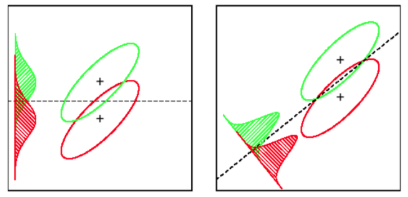

In [2]:
from IPython.display import display, Markdown

html_code = f'<img src="data:image/png;base64,{b64_string}" alt="LDA">'

display(Markdown(html_code))

Regarding the two projections above for a two-class problem in a two-dimensional feature space, the one on the left has better mean seperation (larger difference between the projected means), but has more overlap. The projection on the right has a smaller difference between the projected means, yet has smaller overlap (better class seperation) since it takes into account the within-class variance.

Source: 
https://stats.stackexchange.com/questions/243932/what-is-the-difference-between-svm-and-lda

### Theoretical Background

#### Goal of LDA
Maximise the ratio of between-class variance to the within-class variance in any particular data set, thereby ensuring optimal separability.

#### Mathematical Formulation
1. **Between-Class Scatter Matrix ($S_B$)**:
   $$
   S_B = \sum_{i=1}^{c} N_i (\mu_i - \mu)(\mu_i - \mu)^T
   $$
   Where $\mu_i$ is the mean of class $i$, $\mu$ is the overall mean of the data, and $N_i$ is the number of samples in class $i$.

2. **Within-Class Scatter Matrix ($S_W$)**:
   $$
   S_W = \sum_{i=1}^{c} \sum_{x \in D_i} (x - \mu_i)(x - \mu_i)^T
   $$
   Here, $D_i$ represents the data points belonging to class $i$.

#### Objective Function

Use the following criterion to find the projection matrix $W$ that maximises the separation between classes in the data:
   $$
   J(W) = \frac{|W^T S_B W|}{|W^T S_W W|}
   $$

This function is known as the **Fisher Criterion**, and it aims to maximise the ratio of the between-class variance to the within-class variance after projecting the data onto a lower-dimensional space defined by the projection matrix W.

### Implementation in Python

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

plt.style.use("seaborn-v0_8")

pd.set_option('display.float_format', lambda x: '%.2f' % x)

np.set_printoptions(formatter={'float': '{:.2f}'.format})

In [4]:
# Step 1: Import necessary libraries
from scipy.linalg import eig
from matplotlib.colors import ListedColormap

# Step 2: Load and prepare the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
iris = pd.read_csv(url, names=columns)
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

print(f"{iris.shape = }")

iris.sample(n=5, random_state=111)

iris.shape = (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,label
39,5.10,3.40,1.50,0.20,Iris-setosa
26,5.00,3.40,1.60,0.40,Iris-setosa
109,7.20,3.60,6.10,2.50,Iris-virginica
123,6.30,2.70,4.90,1.80,Iris-virginica
77,6.70,3.00,5.00,1.70,Iris-versicolor


In [5]:
# Step 3: Encode class labels
class_labels = np.unique(y)
label_dict = {label: idx for idx, label in enumerate(class_labels)}
y_encoded = np.array([label_dict[label] for label in y])

y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Step 4: Compute the overall mean and the mean of each class
overall_mean = np.mean(X, axis=0)
mean_vectors = [np.mean(X[y_encoded == label_idx, :], axis=0) for label_idx in range(len(class_labels))]

print(f"{overall_mean = }")

mean_vectors

overall_mean = array([5.84, 3.05, 3.76, 1.20])


[array([5.01, 3.42, 1.46, 0.24]),
 array([5.94, 2.77, 4.26, 1.33]),
 array([6.59, 2.97, 5.55, 2.03])]

In [7]:
# Step 5: Compute the within-class scatter matrix
S_W = np.zeros((X.shape[1], X.shape[1]))

for class_idx, mean_vec in zip(range(len(class_labels)), mean_vectors):
    class_sc_mat = np.zeros((X.shape[1], X.shape[1]))
    for row in X[y_encoded == class_idx]:
        row, mean_vec = row.reshape(X.shape[1], 1), mean_vec.reshape(X.shape[1], 1)
        class_sc_mat += (row - mean_vec).dot((row - mean_vec).T)
    S_W += class_sc_mat

S_W

array([[38.96, 13.68, 24.61, 5.66],
       [13.68, 17.04, 8.12, 4.91],
       [24.61, 8.12, 27.22, 6.25],
       [5.66, 4.91, 6.25, 6.18]])

In [8]:
# Step 6: Compute the between-class scatter matrix
S_B = np.zeros((X.shape[1], X.shape[1]))

for mean_vec, n in zip(mean_vectors, [np.sum(y_encoded == i) for i in range(len(class_labels))]):
    mean_vec = mean_vec.reshape(X.shape[1], 1)
    overall_mean = overall_mean.reshape(X.shape[1], 1)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
S_B

array([[63.21, -19.53, 165.16, 71.36],
       [-19.53, 10.98, -56.06, -22.49],
       [165.16, -56.06, 436.64, 186.91],
       [71.36, -22.49, 186.91, 80.60]])

In [9]:
# Step 7: Solve the generalized eigenvalue problem for the matrix S_W^{-1}S_B
eigen_values, eigen_vectors = eig(np.linalg.inv(S_W).dot(S_B))

print(f"{eigen_values = }")

eigen_vectors

eigen_values = array([ 3.22719578e+01+0.j,  2.77566864e-01+0.j, -2.42789130e-15+0.j,
        5.03167998e-15+0.j])


array([[0.20, -0.01, -0.43, 0.25],
       [0.39, -0.59, -0.15, -0.41],
       [-0.55, 0.25, -0.23, -0.47],
       [-0.71, -0.77, 0.86, 0.75]])

In [10]:
# Step 8: Sort the eigenvalues and select the top k eigenvectors
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i].real) for i in range(len(eigen_values))]

eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

W = np.hstack([eigen_pairs[i][1][:, np.newaxis] for i in range(2)])  # Select two eigenvectors with highest eigenvalues

W

array([[0.20, -0.01],
       [0.39, -0.59],
       [-0.55, 0.25],
       [-0.71, -0.77]])

In [11]:
# Step 9: Transform the data onto the new subspace
X_lda = X.dot(W)

# Show the first 5 rows
X_lda[0:5]

array([[1.49, -1.90],
       [1.26, -1.61],
       [1.35, -1.75],
       [1.18, -1.64],
       [1.51, -1.96]])

In [12]:
# Compute the class means in the LDA-transformed space
mean_vectors_lda = [np.mean(X_lda[y_encoded == label_idx], axis=0) for label_idx in range(len(class_labels))]

mean_vectors_lda

[array([1.37, -1.87]), array([-0.99, -1.62]), array([-1.98, -1.95])]

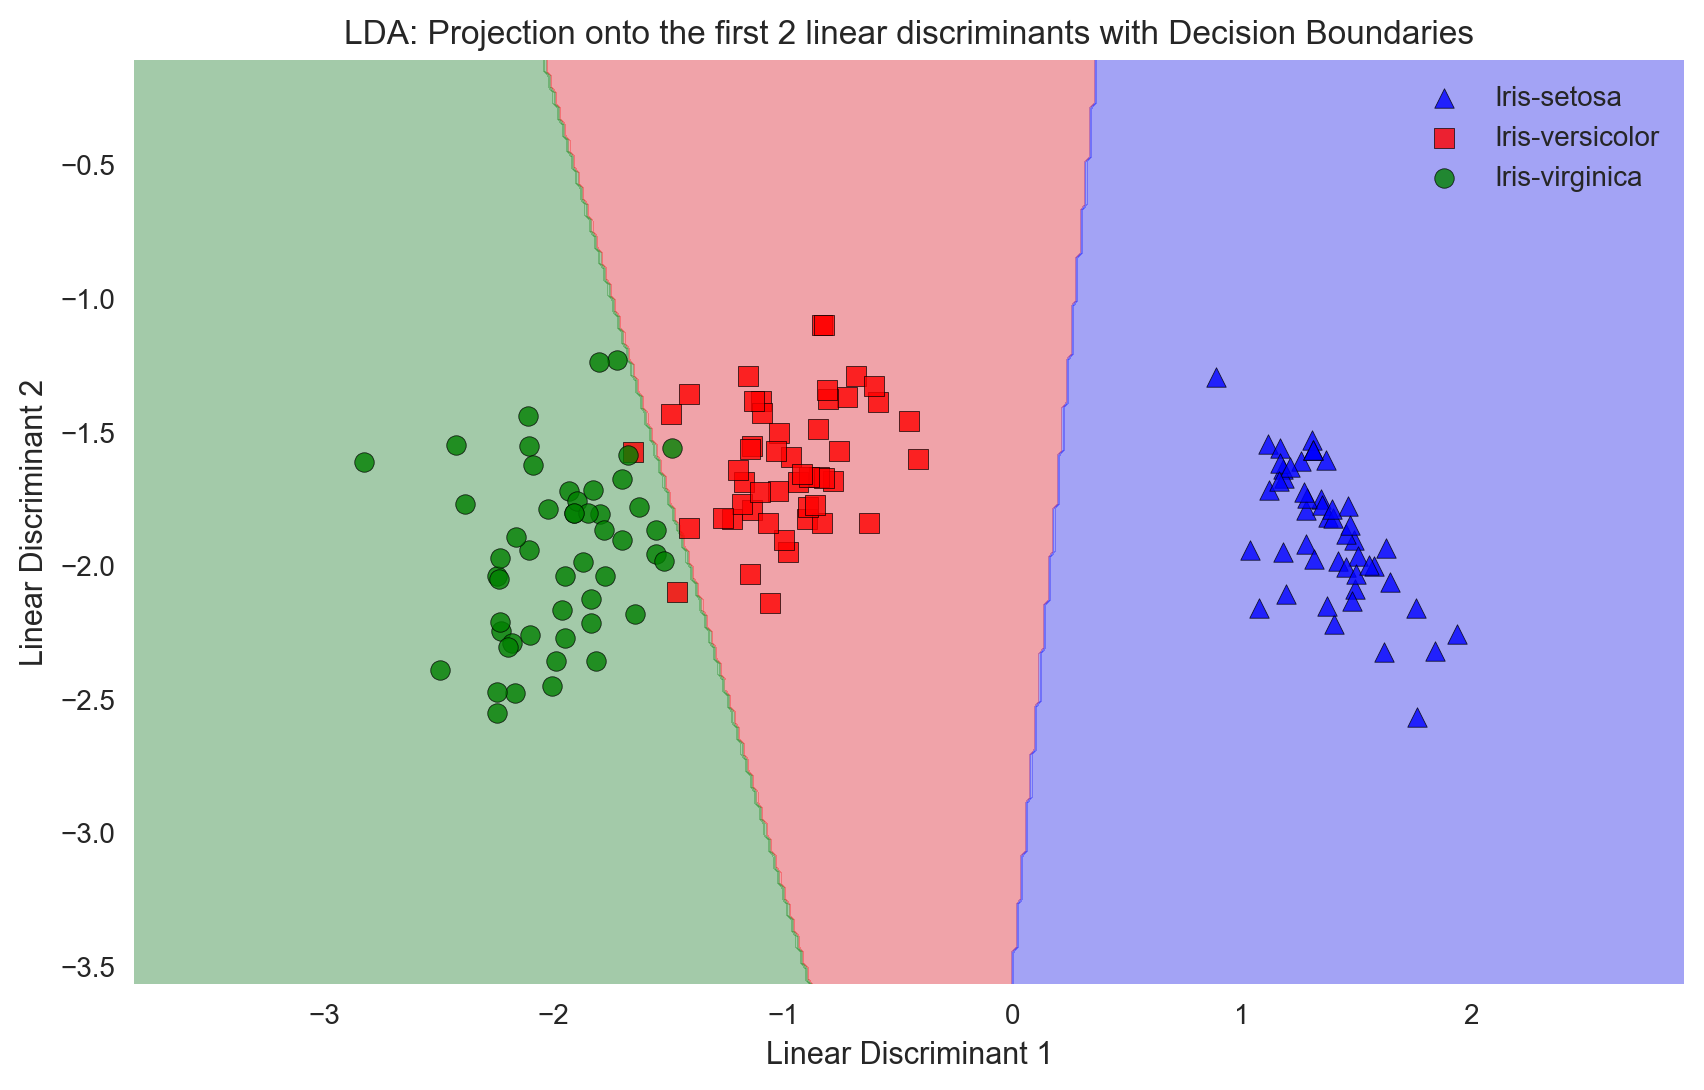

In [13]:
# Step 10: Plotting the decision boundaries in the LDA-transformed space
def plot_lda_decision_regions(X_lda, y, mean_vectors_lda, resolution=0.02):
    # Setup marker generator and color map
    markers = ('^', 's', 'o')
    colors = ('blue', 'red', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Define ranges to plot the decision surface
    x1_min, x1_max = X_lda[:, 0].min() - 1, X_lda[:, 0].max() + 1
    x2_min, x2_max = X_lda[:, 1].min() - 1, X_lda[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Prepare grid points
    grid_points = np.array([xx1.ravel(), xx2.ravel()]).T

    # Calculate decision boundaries
    # For each point in the grid, compute the discriminant function and assign the class with the highest value
    discriminants = []
    for idx in range(len(class_labels)):
        mean_vec = mean_vectors_lda[idx]
        # Since covariance is assumed to be equal, we can ignore it in discriminant function
        discriminant = grid_points.dot(mean_vec) - 0.5 * mean_vec.dot(mean_vec)
        discriminants.append(discriminant)
        
    discriminants = np.array(discriminants)
    Z = np.argmax(discriminants, axis=0)
    Z = Z.reshape(xx1.shape)

    # Plot the decision boundary
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot the actual data in the new space
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X_lda[y == cl, 0], y=X_lda[y == cl, 1],
                    alpha=0.8, color=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')

# Plotting
plt.figure(figsize=(10, 6))

plot_lda_decision_regions(X_lda, y, mean_vectors_lda)

plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(loc='upper right')
plt.title('LDA: Projection onto the first 2 linear discriminants with Decision Boundaries')
plt.grid()
plt.show()

***